# Actividad 26: Caso de Estudio de Aprendizaje Automatizado

En esta actividad, se analizará un caso de estudio fundamental en el ámbito de la seguridad informática: la detección de malware en aplicaciones móviles mediante técnicas de aprendizaje automatizado. El creciente uso de dispositivos móviles, junto con la sofisticación de las amenazas cibernéticas, ha intensificado la necesidad de contar con herramientas eficaces para proteger la información personal y la integridad de los sistemas.

A lo largo de la clase, se examinarán métodos de clasificación que permiten identificar aplicaciones maliciosas en archivos APK, aplicando algoritmos de aprendizaje automatizado para diferenciar entre aplicaciones seguras y aquellas que representan un riesgo. Se profundizará en la selección y evaluación de modelos, así como en la implementación de un modelo de clasificación que pueda emplearse en la detección de malware.

Finalmente, el trabajo realizado se documentará en un repositorio de GitHub, siguiendo prácticas de desarrollo colaborativo y brindando una base sólida para el análisis práctico en seguridad informática. Esta actividad está orientada a fortalecer tanto el conocimiento técnico en ciencia de datos como las habilidades de trabajo en equipo y documentación.

## Indicaciones

En este ejercicio, se utilizarán los conocimientos adquiridos durante el curso para analizar APKs y crear un pequeño “antivirus”, así como para responder a varias preguntas relacionadas con los datos.

A continuación, se detallan las indicaciones para llevar a cabo el análisis, teniendo en cuenta que son instrucciones generales y no un “paso a paso” para solucionar el ejercicio:

- **Paso 1: Configuración del entorno**
  - Configura tu entorno de desarrollo en Python y asegúrate de tener instaladas las bibliotecas necesarias, como Pandas, Scikit-Learn y Matplotlib.

- **Paso 2: Descarga de los datos**
  - Descarga el archivo “apk_samples.csv” de la ubicación que el profesor te dará, que contiene muestras de APKs maliciosas y benignas.

- **Paso 3: Exploración de datos**
  - Carga el archivo CSV y realiza una exploración inicial de los datos para comprender su estructura y contenido.
  - Genera visualizaciones que te ayuden a entender la distribución de las etiquetas y las características.

- **Paso 4: Preprocesamiento de datos**
  - Trata cualquier valor faltante, si los hay.
  - Codifica las etiquetas “0” y “1” de la columna `type` como “maliciosa” y “benigna”, respectivamente.
  - Divide los datos en conjuntos de entrenamiento y prueba.

- **Paso 5: Selección de algoritmos de clasificación**
  - Investiga al menos 3 algoritmos de clasificación adecuados para la detección de malware (por ejemplo, SVM, Regresión Logística, Random Forest).
  - Elige los algoritmos que consideres más apropiados y justifica tu elección.

- **Paso 6: Entrenamiento y evaluación de modelos**
  - Divide el conjunto de entrenamiento en subconjuntos para validación cruzada.
  - Entrena los algoritmos seleccionados mediante un pipeline utilizando validación cruzada y evalúa su rendimiento utilizando métricas como precisión, exhaustividad y F1-score.

- **Paso 7: Selección del mejor clasificador**
  - Compara los resultados de los algoritmos y determina cuál ofrece el mejor rendimiento.
  - Explica las razones detrás de la elección del mejor clasificador.

- **Paso 8: Implementación del modelo de clasificación**
  - Utiliza el mejor clasificador para crear un modelo de detección de malware.
  - Demuestra cómo se puede emplear este modelo para determinar si una APK desconocida es maliciosa o benigna.

- **Paso 9: Documentación en GitHub**
  - Crea o utiliza un repositorio en GitHub para este ejercicio.
  - Sube el código fuente, los conjuntos de datos y la documentación necesaria al repositorio.

- **Paso 10: Elaboración del informe**
  - Prepara un informe que incluya los resultados de la evaluación de los algoritmos, la selección del mejor clasificador y la implementación del modelo de clasificación.
  - Agrega comentarios y consideraciones sobre el análisis realizado durante la práctica.

- **Paso 11: Presentación y evaluación**
  - Presenta tus resultados y hallazgos.

## Entendiendo los datos

El conjunto de datos utilizado en este ejercicio contiene 398 muestras de aplicaciones Android (APKs), divididas en 199 aplicaciones maliciosas y 199 aplicaciones benignas. Estas aplicaciones se representaron por los permisos que solicitan durante su instalación y funcionamiento. La solicitud de permisos específicos es una de las características más relevantes para analizar el comportamiento potencial de una aplicación en Android.

### Tipos de Permisos en Android

En el sistema operativo Android, existen aproximadamente 330 permisos distintos que los desarrolladores pueden solicitar al crear una aplicación. Estos permisos regulan el acceso de las aplicaciones a funciones y datos específicos en el dispositivo, y se dividen en diferentes categorías que reflejan su nivel de riesgo y su potencial impacto en la privacidad y seguridad del usuario.

#### Permisos de Bajo Riesgo

Algunos permisos son considerados relativamente inocuos, ya que no otorgan acceso a información sensible ni permiten acciones que afecten la seguridad del dispositivo o la privacidad del usuario. Ejemplos de estos permisos incluyen:

- `ACCESS_NETWORK_STATE`: permite a la aplicación saber si hay conexión a Internet, sin conectarse.
- `VIBRATE`: permite a la aplicación activar la vibración en el dispositivo.
- `SET_WALLPAPER`: permite a la aplicación cambiar el fondo de pantalla del dispositivo.

Estos permisos son necesarios para ciertas funciones menores de la aplicación y, en general, no presentan riesgos importantes para el usuario.

#### Permisos de Alto Riesgo

Otros permisos, sin embargo, pueden permitir a una aplicación acceder a información privada o realizar acciones críticas que, en manos de aplicaciones maliciosas, comprometen la seguridad del usuario. Ejemplos de estos permisos son:

- `READ_CONTACTS`: permite acceder a la lista de contactos, lo cual es sensible si se usa para recopilación de datos o spam.
- `ACCESS_FINE_LOCATION`: permite rastrear la ubicación precisa del usuario, lo cual puede ser problemático en términos de privacidad.
- `SEND_SMS`: permite enviar mensajes SMS desde el dispositivo, lo cual puede derivar en cargos no autorizados o incluso fraude.
- `RECORD_AUDIO`: permite la grabación de audio, que podría ser usado para espiar al usuario.

#### Representar las APKs por sus Permisos: Justificación

La representación de aplicaciones a través de los permisos que solicitan es útil para la detección de comportamientos potencialmente maliciosos. En Android, los permisos sirven como una interfaz pública que todas las aplicaciones deben utilizar para acceder a recursos específicos del sistema operativo. Debido a esta uniformidad, la solicitud de ciertos permisos puede indicar, de forma medible, el comportamiento esperado de una aplicación.

La premisa de que las aplicaciones maliciosas tienden a solicitar permisos similares y de mayor peligrosidad es respaldada por el hecho de que el malware generalmente necesita acceder a funciones sensibles para realizar acciones malintencionadas. Por ejemplo, muchas aplicaciones maliciosas solicitan permisos como `READ_CONTACTS`, `SEND_SMS`, o `ACCESS_FINE_LOCATION`, que pueden ser explotados para obtener datos personales, interceptar comunicaciones o realizar acciones no autorizadas. Esto las diferencia de aplicaciones benignas, que suelen limitarse a permisos esenciales y menos invasivos.

#### Limitaciones de Este Enfoque

Si bien esta representación es efectiva, también presenta limitaciones, ya que no todos los permisos solicitados por una aplicación determinan por sí solos su intencionalidad. Algunas aplicaciones benignas pueden requerir permisos sensibles debido a sus funcionalidades (por ejemplo, una aplicación de mapas que requiere acceso a la ubicación). Asimismo, algunos malware avanzados logran evadir la detección solicitando permisos aparentemente inocuos.

Este contexto ayudará a construir un modelo de clasificación que, basándose en los permisos, pueda ofrecer una aproximación para diferenciar entre aplicaciones benignas y potencialmente maliciosas.

### Etiquetas

En el conjunto de datos utilizado en este ejercicio, las aplicaciones Android (APKs) están etiquetadas como **maliciosas** o **benignas**. Estas etiquetas son cruciales para el propósito de la clasificación, ya que permiten distinguir entre aplicaciones que representan una amenaza potencial y aquellas que no.

Las etiquetas en el conjunto de datos son binarias, representadas por los valores:

- **0**: Representa una **aplicación benigna**, es decir, una aplicación que no presenta comportamientos maliciosos conocidos y que no pone en riesgo la seguridad o privacidad del usuario.
- **1**: Representa una **aplicación maliciosa**, es decir, una aplicación que ha sido identificada como una amenaza, ya sea por sus permisos solicitados, su comportamiento sospechoso, o la presencia de código malicioso como virus o spyware.

Es importante señalar que las etiquetas en este conjunto de datos han sido predefinidas y verificadas por expertos en seguridad, lo que les da fiabilidad. Sin embargo, en la práctica, el etiquetado puede ser un desafío debido a la constante evolución de las amenazas. Nuevas formas de malware pueden no estar etiquetadas correctamente en el conjunto de datos, lo que puede influir en la capacidad del modelo para generalizar. Por ello, es fundamental mantener los conjuntos de datos actualizados para reflejar las amenazas actuales.

## Análisis de Datos

En esta fase, el objetivo es cargar el conjunto de datos y explorar su estructura, distribuciones y cualquier posible anomalía o patrón que pueda influir en el modelo de clasificación. Primeramente se debe establecer el entorno de trabajo adecuado para poder solucionar el ejercicio.

### Paso 1: Preparación del entorno

Se debe configurar el entorno de desarrollo en Python y asegurarse de tener instaladas las bibliotecas necesarias.

In [1]:
%pip install pandas scikit-learn matplotlib seaborn plotly

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------------------- ------------------- 5.8/11.5 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 32.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------------------- -------- 8.7/11.0 MB 53.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 40.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------------- - 7.6/7.8 MB 36.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   --------------- ------------------------ 7.6/19.1 MB 36.2 MB/s eta 0:00:01
   ------------------------------- -------- 15.2/19.1 MB 36.8 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 30.8 MB/s eta 0:00:00
   --------------

#### Importar librerías

Una vez instaladas las librerías que se usarán, se deben importar. Se recomienda importar todas las librerías en una celda o en una misma sección, para lograr tener un código más organizado.

In [3]:
# --- Manipulación y Visualización de Datos ---
import pandas as pd                       # Manipulación de datos en estructuras de DataFrames
import numpy as np                        # Operaciones numéricas y manipulación de matrices

# Visualización
import matplotlib.pyplot as plt           # Visualización de gráficos estáticos
import seaborn as sns                     # Visualización avanzada y estilos para matplotlib
import plotly.express as px               # Visualización interactiva

# --- Reducción de Dimensionalidad y Clustering ---
from sklearn.decomposition import PCA              # Análisis de componentes principales (PCA) para reducción de dimensionalidad
from sklearn.manifold import TSNE                  # Reducción de dimensionalidad con t-SNE para visualización en 2D o 3D
from sklearn.cluster import KMeans                 # Algoritmo de clustering K-means
from sklearn.mixture import GaussianMixture        # Algoritmo de clustering basado en mezcla gaussiana (GMM)

# --- Preprocesamiento y Pipeline ---
from sklearn.preprocessing import StandardScaler           # Estandarización de características (media 0, desviación estándar 1)
from sklearn.pipeline import Pipeline                      # Creación de pipelines para encadenar pasos de procesamiento y modelado
from sklearn.model_selection import train_test_split       # Dividir el dataset en conjuntos de entrenamiento y prueba

# --- Métricas de Evaluación ---
from sklearn.metrics import (
    accuracy_score,                        # Precisión global
    precision_score,                       # Precisión para clasificación binaria y multiclase
    recall_score,                          # Sensibilidad o recall (importante para detectar falsos negativos)
    f1_score,                              # F1 score (media armónica entre precisión y recall)
    silhouette_score,                      # Puntaje de Silhouette para evaluar la calidad de clusters
    adjusted_rand_score,                   # Índice de Rand Ajustado (ARI) para comparar clusters
    confusion_matrix,                      # Matriz de confusión
    ConfusionMatrixDisplay,                # Visualización de la matriz de confusión
    roc_curve,                             # Curva ROC para evaluación de modelos binarios
    roc_auc_score                          # Área bajo la curva ROC (AUC) como métrica de rendimiento binario
)

# --- Clasificadores ---
from sklearn.ensemble import RandomForestClassifier         # Clasificador Random Forest
from sklearn.linear_model import LogisticRegression         # Regresión logística para clasificación binaria o multiclase
from sklearn.svm import SVC                                 # Máquina de soporte vectorial (SVM) para clasificación
from sklearn.tree import DecisionTreeClassifier             # Árbol de decisión para clasificación
from sklearn.neighbors import KNeighborsClassifier          # Algoritmo de clasificación de K-vecinos más cercanos (KNN)
from sklearn.naive_bayes import GaussianNB                  # Clasificador Naive Bayes basado en distribución gaussiana


### Paso 2: Obtención de datos

Una vez se tienen las librerías que se usarán cargadas, entonces se puede pasar a leer los datos. Hay que tener en cuenta que el separador de los  valores en los datos es el caracter `;`.

In [4]:
# Cargar el conjunto de datos
df = pd.read_csv('apk_samples.csv', sep=";")

# Mostrar las primeras filas para explorar los datos
df.head()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

Una vez cargados los datos se deben mostrar sus dimensiones para ver si se cargaron correctamente.

In [5]:
print(f"Se cargaron {df.shape[0]} muestras de APKs en {df.shape[1]} caracteristicas.")

Se cargaron 398 muestras de APKs en 331 caracteristicas.


Se deben imprimir el nombre de las columnas para futuros procesos

In [6]:
for col in df.columns:
    print(col)

 android
android.app.cts.permission.TEST_GRANTED
android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE
android.os.cts.permission.TEST_GRANTED
android.permission.ACCESS_ALL_DOWNLOADS
android.permission.ACCESS_ALL_EXTERNAL_STORAGE
android.permission.ACCESS_BLUETOOTH_SHARE
android.permission.ACCESS_CACHE_FILESYSTEM
android.permission.ACCESS_CHECKIN_PROPERTIES
android.permission.ACCESS_COARSE_LOCATION
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY
android.permission.ACCESS_DOWNLOAD_MANAGER
android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED
android.permission.ACCESS_DRM_CERTIFICATES
android.permission.ACCESS_FINE_LOCATION
android.permission.ACCESS_FM_RADIO
android.permission.ACCESS_INPUT_FLINGER
android.permission.ACCESS_KEYGUARD_SECURE_STORAGE
android.permission.ACCESS_LOCATION_EXTRA_COMMANDS
android.permission.ACCESS_MOCK_LOCATION
android.permission.ACCESS_MTP
android.permission.ACCESS_NETWORK_CONDITIONS
android.permission.ACCESS_NETWORK_STATE
android.permission.ACCESS_NOTI

### Paso 3: Exploración Inicial de los Datos##

Una vez cargado el conjunto de datos, es importante realizar una inspección inicial para comprender la estructura de las muestras, qué columnas están presentes y verificar si hay valores faltantes.

In [7]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 331 entries,  android to type
dtypes: int64(331)
memory usage: 1.0 MB


In [8]:
# Resumen estadístico de las columnas numéricas
df.describe()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_FM_RADIO,android.permission.ACCESS_INPUT_FLINGER,android.permission.ACCESS_KEYGUARD_SECURE_STORAGE,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_MTP,android.permission.ACCESS_NETWORK_CONDITIONS,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_NOTIFICATIONS,android.permission.ACCESS_PDB_STATE,android.permission.ACCESS_SURFACE_FLINGER,android.permission.ACCESS_WIFI_STATE,android.permission.ACCESS_WIMAX_STATE,android.permission.ACCOUNT_MANAGER,android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK,android.permission.ASEC_ACCESS,android.permission.ASEC_CREATE,android.permission.ASEC_DESTROY,android.permission.ASEC_MOUNT_UNMOUNT,android.permission.ASEC_RENAME,android.permission.AUTHENTICATE_ACCOUNTS,android.permission.BACKUP,android.permission.BATTERY_STATS,android.permission.BIND_ACCESSIBILITY_SERVICE,android.permission.BIND_APPWIDGET,...,com.android.cts.permissionWithSignature,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,com.android.frameworks.coretests.DANGEROUS,com.android.frameworks.coretests.NORMAL,com.android.frameworks.coretests.SIGNATURE,com.android.frameworks.coretests.keysets_permdef.keyset_perm,com.android.frameworks.coretests.permission.TEST_DENIED,com.android.frameworks.coretests.permission.TEST_GRANTED,com.android.gallery3d.filtershow.permission.READ,com.android.gallery3d.filtershow.permission.WRITE,com.android.gallery3d.permission.GALLERY_PROVIDER,com.android.launcher.permission.INSTALL_SHORTCUT,com.android.launcher.permission.PRELOAD_WORKSPACE,com.android.launcher.permission.READ_SETTINGS,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.android.launcher.permission.WRITE_SETTINGS,com.android.launcher3.permission.READ_SETTINGS,com.android.launcher3.permission.RECEIVE_FIRST_LOAD_BROADCAST,com.android.launcher3.permission.RECEIVE_LAUNCH_BROADCASTS,com.android.launcher3.permission.WRITE_SETTINGS,com.android.permission.WHITELIST_BLUETOOTH_DEVICE,com.android.printspooler.permission.ACCESS_ALL_PRINT_JOBS,com.android.providers.tv.permission.ACCESS_ALL_EPG_DATA,com.android.providers.tv.permission.ACCESS_WATCHED_PROGRAMS,com.android.providers.tv.permission.READ_EPG_DATA,com.android.providers.tv.permission.WRITE_EPG_DATA,com.android.smspush.WAPPUSH_MANAGER_BIND,com.android.voicemail.permission.ADD_VOICEMAIL,com.android.voicemail.permission.READ_VOICEMAIL,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.0,398.000000,398.000000,398.0,398.000000,398.0,398.0,398.0,398.000000,398.000000,398.0,398.0,398.000000,398.0,398.0,398.0,398.000000,398.000000,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.0,398.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,398.000000,398.000000,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0

In [9]:
# Verificar si hay valores nulos
df.isnull().sum()

 android                                                       0
android.app.cts.permission.TEST_GRANTED                        0
android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE    0
android.os.cts.permission.TEST_GRANTED                         0
android.permission.ACCESS_ALL_DOWNLOADS                        0
                                                              ..
org.chromium.chrome.shell.permission.SANDBOX                   0
org.chromium.chromecast.shell.permission.SANDBOX               0
org.chromium.content_shell.permission.SANDBOX                  0
test_permission                                                0
type                                                           0
Length: 331, dtype: int64

El análisis anterior muestra los resultados de los valores faltantes por columnas, pero son muchas columnas. Necesitamos determinar en total si en el dataset hay valores faltantes. Para ello sumamos todos los valores faltantes obtenidos por columnas y ver qué pasa.

In [11]:
total_missing_values = df.isnull().sum().sum()

print(f"En el dataset hay {total_missing_values} en total.")

En el dataset hay 0 en total.


### Paso 4: Distribución de las Etiquetas

Es útil entender cómo están distribuidas las clases de las aplicaciones en el conjunto de datos. Debemos observar si hay un balance entre las aplicaciones maliciosas y benignas. Esto puede influir en la elección de técnicas de balanceo o en la evaluación del rendimiento del modelo.

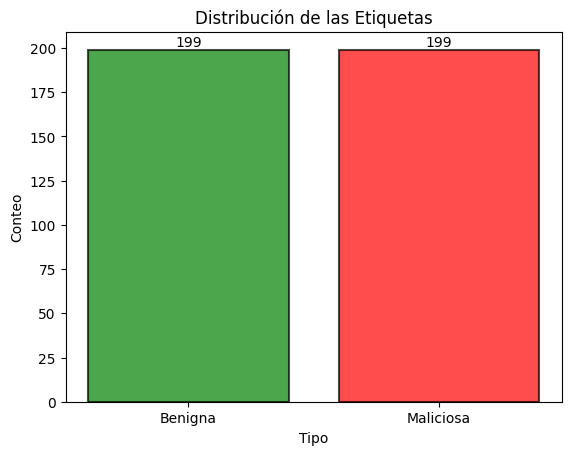

In [17]:
# Distribución de las etiquetas (0: benigna, 1: maliciosa)
df_counts = df['type'].value_counts().sort_index()  # Ordena las categorías por índice (0 y 1)

# Crear el gráfico de barras
fig, ax = plt.subplots()

# Asignar colores basados en la categoría (0 = verde, 1 = rojo)
colors = ['green' if label == 0 else 'red' for label in df_counts.index]
bars = ax.bar(df_counts.index, df_counts.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Añadir los valores encima de cada barra
ax.bar_label(bars, label_type='edge')

# Configuración adicional del gráfico
ax.set_title("Distribución de las Etiquetas")
ax.set_xlabel("Tipo")
ax.set_ylabel("Conteo")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benigna', 'Maliciosa'])  # Etiquetas personalizadas para las categorías

plt.show()

### Paso 5: Visualización de la Distribución de los Permisos

Dado que las aplicaciones están caracterizadas por los permisos que solicitan, es relevante visualizar cómo se distribuyen los permisos entre las aplicaciones maliciosas y benignas. Esto puede ayudarnos a identificar patrones, como la prevalencia de ciertos permisos en las aplicaciones maliciosas.

De todos los permisos de Android cinco de los mas peligrosos, que pueden comprometer gravemente la privacidad y la seguridad del usuario, son:

- **android.permission.ACCESS_FINE_LOCATION**: Acceso a la ubicación precisa del usuario.
- **android.permission.READ_SMS**: Permite leer los mensajes SMS, exponiendo datos personales sensibles.
- **android.permission.CALL_PHONE**: Permite realizar llamadas telefónicas sin el conocimiento del usuario.
- **android.permission.INSTALL_PACKAGES**: Permite instalar aplicaciones sin la intervención del usuario.
- **android.permission.MASTER_CLEAR**: Permite restablecer el dispositivo a su configuración de fábrica, eliminando todos los datos del usuario.

In [19]:
# Lista de permisos
permisos = [
    'android.permission.ACCESS_FINE_LOCATION',
    'android.permission.READ_SMS',
    'android.permission.CALL_PHONE',
    'android.permission.INSTALL_PACKAGES',
    'android.permission.MASTER_CLEAR'
]

Primero se analiza la distribución entre todas las muestras, sin importar el tipo. Para ello se define una función `plot_permiso` que realiza esta grafica para los datos de entrada.

In [30]:
# Función para graficar la distribución de permisos en un solo gráfico
def plot_permisos(df, tipo_app, color0='green', color1='red'):
    # Configuración inicial del gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    indices = np.arange(len(permisos))

    # Recopilamos los datos de conteo de cada permiso
    counts_0 = [df[df[permiso] == 0][permiso].count() for permiso in permisos]
    counts_1 = [df[df[permiso] == 1][permiso].count() for permiso in permisos]

    # Crear barras para los valores 0 y 1 para cada permiso
    bars0 = ax.bar(indices - bar_width / 2, counts_0, bar_width, label='No otorgado', color=color0, alpha=0.7, edgecolor='black', linewidth=1.5)
    bars1 = ax.bar(indices + bar_width / 2, counts_1, bar_width, label='Otorgado', color=color1, alpha=0.7, edgecolor='black', linewidth=1.5)

    # Añadir etiquetas encima de cada barra
    ax.bar_label(bars0, label_type='edge')
    ax.bar_label(bars1, label_type='edge')

    # Configuración de etiquetas y título
    ax.set_title(f'Distribución de Permisos ({tipo_app})')
    ax.set_xlabel('Permisos')
    ax.set_ylabel('Cantidad de Aplicaciones')
    ax.set_xticks(indices)
    ax.set_xticklabels(permisos)

    # Inclinamos los nombres de los tics del eje X en 45 grados
    plt.xticks(rotation=45)

    ax.legend()

    # Mostrar el gráfico
    plt.show()

Ahora se llama la funcion `plot_permiso` para los datos generales y luego para cada clase.

In [28]:
# Filtramos el DataFrame para aplicaciones benignas y maliciosas
df_benigna = df[df['type'] == 0]
df_maliciosa = df[df['type'] == 1]

Distribución de permisos en aplicaciones en general:


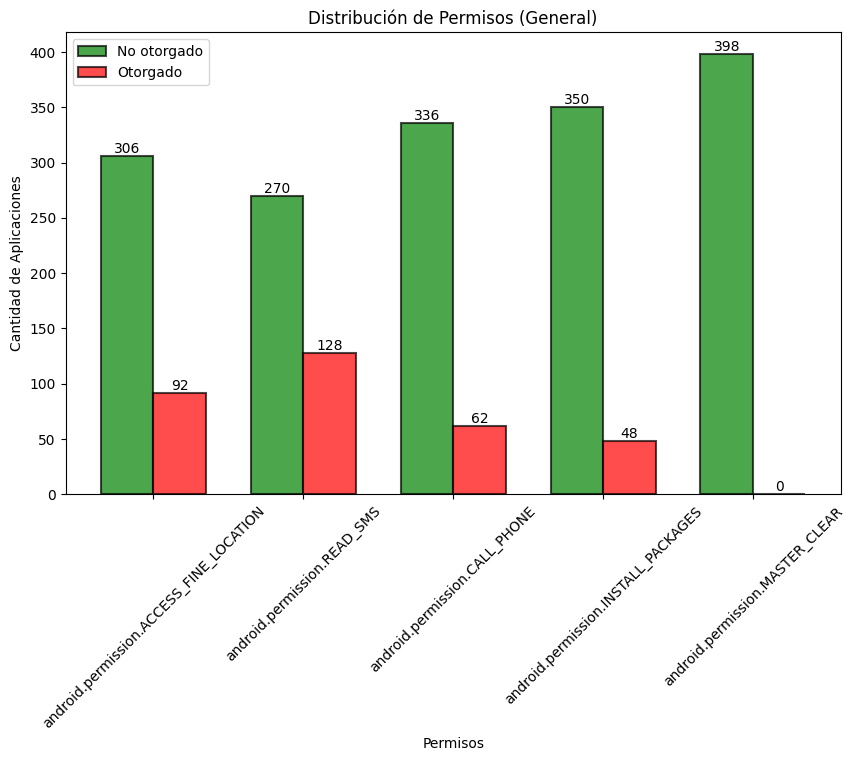

In [ ]:
# Graficar la distribución de permisos para aplicaciones en general
print("Distribución de permisos en aplicaciones en general:")
plot_permisos(df, "General")

Ahora se representan las benignas

Distribución de permisos en aplicaciones benignas:


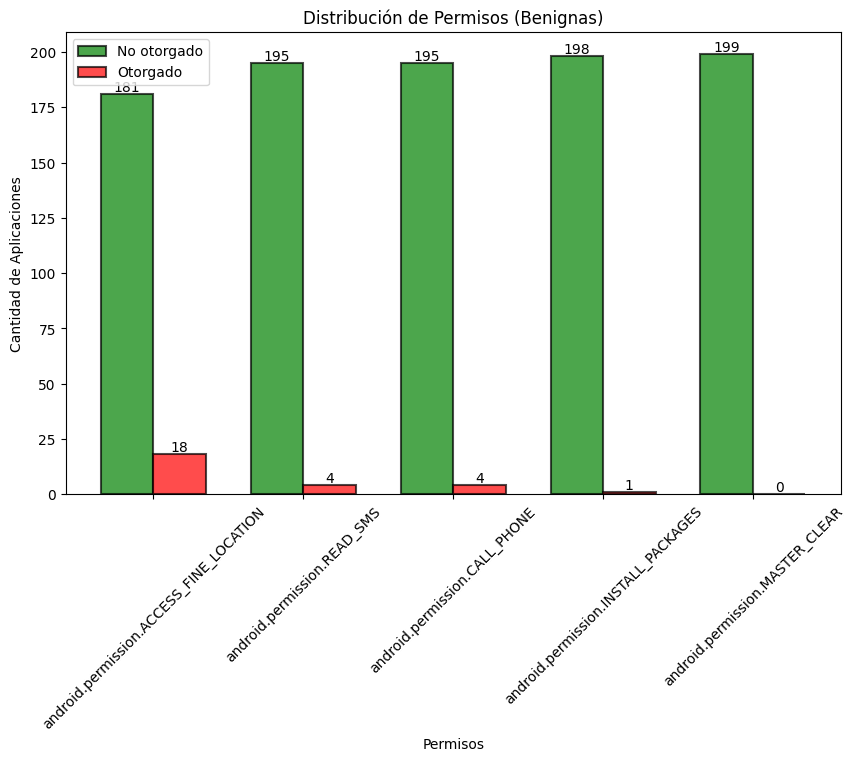

In [ ]:
# Graficar la distribución de permisos para aplicaciones benignas
print("Distribución de permisos en aplicaciones benignas:")
plot_permisos(df_benigna, "Benignas")

Ahora las malignas

Distribución de permisos en aplicaciones malignas:


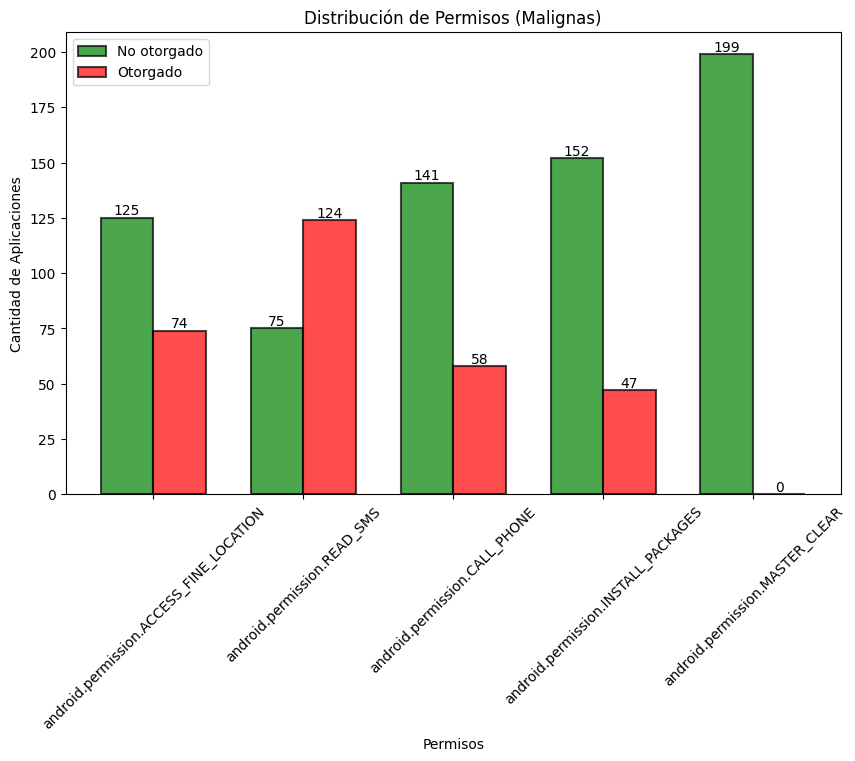

In [34]:
# Graficar la distribución de permisos para aplicaciones malignas
print("Distribución de permisos en aplicaciones malignas:")
plot_permisos(df_maliciosa, "Malignas")

### Paso 6: Análisis de Correlación

El análisis de correlación es una técnica útil para identificar relaciones entre las diferentes características del conjunto de datos. Aunque las correlaciones no son directamente causales, pueden darnos una idea de qué permisos tienden a aparecer juntos y cómo se relacionan con la clase (benigna o maliciosa).

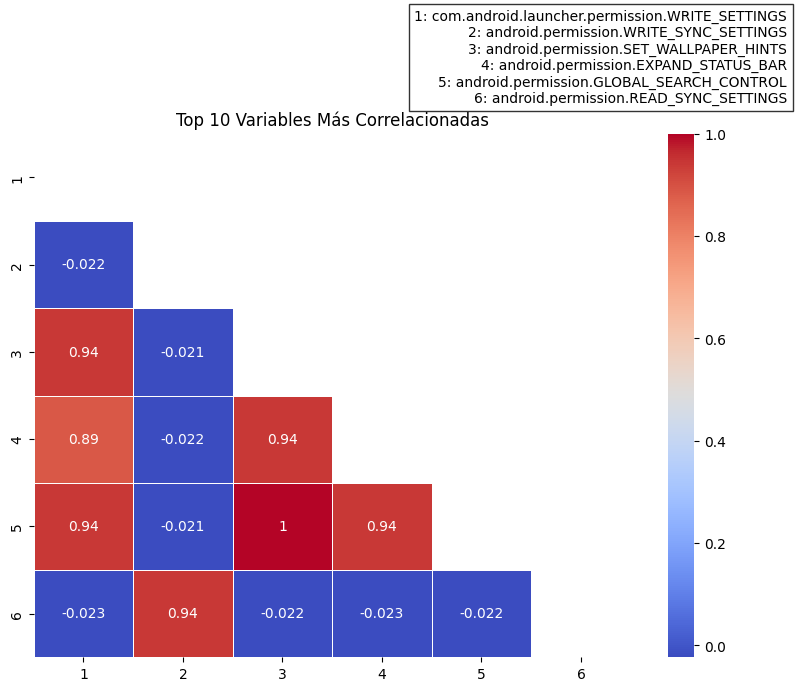

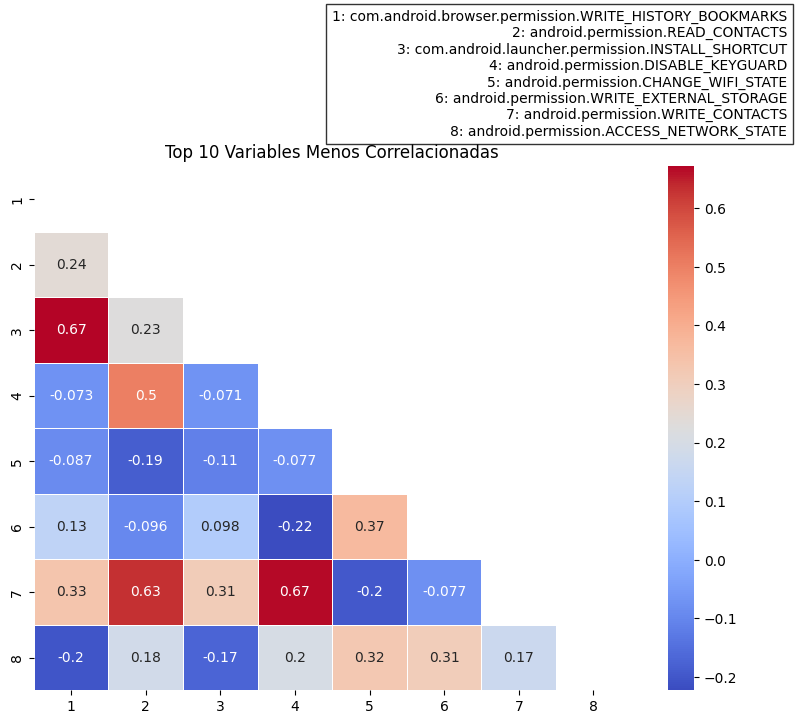

In [35]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Ordenar la matriz de correlación para obtener las 10 mayores y menores correlaciones
correlation_matrix = correlation_matrix.unstack().sort_values(ascending=False)

# Filtrar las correlaciones que no son entre la misma variable (evitar la diagonal)
correlation_matrix = correlation_matrix[correlation_matrix < 1]

# Obtener las 10 mayores correlaciones (top correlaciones)
top_10 = correlation_matrix.head(10)

# Obtener las 10 menores correlaciones (bottom correlaciones)
bottom_10 = correlation_matrix.tail(10)

# Obtener las variables más y menos correlacionadas
top_variables = list(set(top_10.index.get_level_values(0).append(top_10.index.get_level_values(1))))
bottom_variables = list(set(bottom_10.index.get_level_values(0).append(bottom_10.index.get_level_values(1))))

# Crear las submatrices de correlación para las variables seleccionadas
top_corr_matrix = df[top_variables].corr()
bottom_corr_matrix = df[bottom_variables].corr()

# Crear un mapeo de los nombres de las variables a números
top_variable_map = {name: str(i+1) for i, name in enumerate(top_variables)}
bottom_variable_map = {name: str(i+1) for i, name in enumerate(bottom_variables)}

# Reemplazar los nombres de las variables en las matrices de correlación por números
top_corr_matrix = top_corr_matrix.rename(columns=top_variable_map, index=top_variable_map)
bottom_corr_matrix = bottom_corr_matrix.rename(columns=bottom_variable_map, index=bottom_variable_map)

# Crear las máscaras para las matrices triangulares
mask_top = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
mask_bottom = np.triu(np.ones_like(bottom_corr_matrix, dtype=bool))

# Graficar el heatmap triangular para las 10 variables más correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', mask=mask_top, linewidths=0.5)
plt.title('Top 10 Variables Más Correlacionadas')

# Crear leyenda con los números y los nombres de las variables
plt.figtext(0.99, 0.99, '\n'.join([f"{i+1}: {name}" for i, name in enumerate(top_variables)]), 
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Graficar el heatmap triangular para las 10 variables menos correlacionadas
plt.figure(figsize=(8, 6))
sns.heatmap(bottom_corr_matrix, annot=True, cmap='coolwarm', mask=mask_bottom, linewidths=0.5)
plt.title('Top 10 Variables Menos Correlacionadas')

# Crear leyenda con los números y los nombres de las variables
plt.figtext(0.99, 0.99, '\n'.join([f"{i+1}: {name}" for i, name in enumerate(bottom_variables)]), 
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Correlaciones de todas las variables con 'type':
android.permission.ACCESS_CACHE_FILESYSTEM                0.071067
android.permission.ACCESS_COARSE_LOCATION                 0.397817
android.permission.ACCESS_DOWNLOAD_MANAGER                0.050189
android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED       0.050189
android.permission.ACCESS_FINE_LOCATION                   0.333759
                                                            ...   
com.android.browser.permission.WRITE_HISTORY_BOOKMARKS    0.145095
com.android.launcher.permission.INSTALL_SHORTCUT          0.086978
com.android.launcher.permission.READ_SETTINGS             0.107287
com.android.launcher.permission.UNINSTALL_SHORTCUT        0.029050
com.android.launcher.permission.WRITE_SETTINGS            0.152106
Name: type, Length: 92, dtype: float64


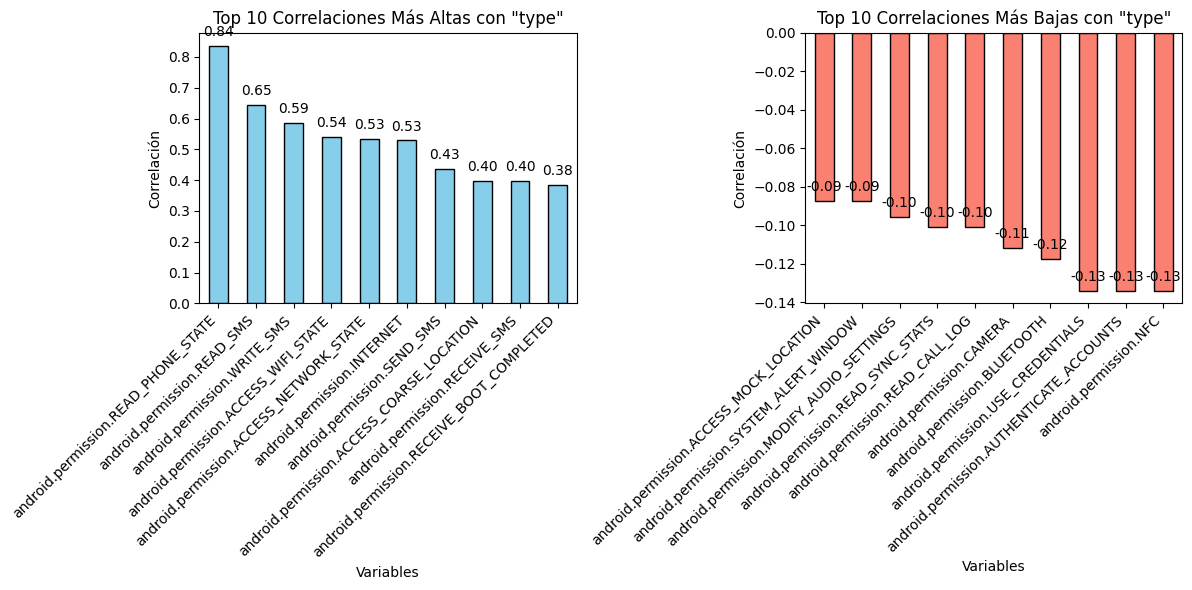

In [36]:
# Calcular la correlación de todas las variables con respecto a 'type'
correlation_with_type = df.corr()['type'].drop('type')  # Excluimos la correlación de 'type' consigo mismo

# Eliminar las correlaciones NaN
correlation_with_type = correlation_with_type.dropna()

# Ordenar las correlaciones por valor absoluto (más altas y más bajas)
sorted_correlations = correlation_with_type.sort_values(ascending=False)

# Tomar las 10 correlaciones más altas y más bajas
top_correlations = sorted_correlations.head(10)  # Las 10 más altas
bottom_correlations = sorted_correlations.tail(10)  # Las 10 más bajas

# Mostrar todas las correlaciones
print("Correlaciones de todas las variables con 'type':")
print(correlation_with_type)

# Graficar las 10 mejores correlaciones
plt.figure(figsize=(12, 6))

# Primer gráfico: las 10 correlaciones más altas
plt.subplot(1, 2, 1)
ax1 = top_correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Correlaciones Más Altas con "type"')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valor sobre las barras
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Segundo gráfico: las 10 correlaciones más bajas
plt.subplot(1, 2, 2)
ax2 = bottom_correlations.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Correlaciones Más Bajas con "type"')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valor sobre las barras
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

Los valores que estás viendo corresponden a las correlaciones entre las diferentes variables (permisos de las aplicaciones en este caso) y la variable `type` en tu conjunto de datos.

La **correlación** mide la relación entre dos variables. En este caso, está midiendo cómo cada permiso se relaciona con la variable `type`.

- **Valores cercanos a 1**: Correlación positiva fuerte. A medida que una variable aumenta, la otra también lo hace.
- **Valores cercanos a -1**: Correlación negativa fuerte. A medida que una variable aumenta, la otra disminuye.
- **Valores cercanos a 0**: No hay correlación clara entre las dos variables.

**Análisis de los resultados de correlacion**

- **android.permission.ACCESS_COARSE_LOCATION**: Correlación de **0.397817** con `type`. Indica una relación moderada positiva. A medida que cambia este permiso, `type` también cambia, pero no de forma muy fuerte.
- **android.permission.ACCESS_CACHE_FILESYSTEM**: Correlación de **0.071067**. Esto indica una correlación débil con `type`, lo que sugiere que no hay una relación significativa.
- **com.android.launcher.permission.INSTALL_SHORTCUT**: Correlación de **0.086978**. Otra correlación débil, lo que también sugiere poca relación con `type`.

**Qué significado tiene?**

- **Correlaciones cercanas a 0**: Indican que el permiso no tiene una relación significativa con la variable `type`.
- **Correlaciones cercanas a 1 o -1**: Indican una relación más fuerte. Estas son las variables que podrían ser más relevantes si buscas patrones o relaciones específicas con `type`.

**¿Qué hacer con esta información?**

1. **Correlaciones Fuertes**:
   - Las variables con valores cercanos a 1 o -1 pueden ser más relevantes para un análisis más profundo, ya que muestran relaciones más claras con `type`.
   
2. **Correlaciones Débiles**:
   - Las variables con valores cercanos a 0 pueden no ser tan útiles para clasificar o predecir `type`, ya que no tienen una relación clara con esta variable.


### Paso 7: Visualización de datos

En este análisis, la premisa subyacente es que los datos de aplicaciones maliciosas y benignas pueden ser separables en el espacio de características. Sin embargo, los datos disponibles presentan una alta dimensionalidad (331 dimensiones), lo que hace que la representación y visualización directa de los mismos sea prácticamente imposible. Para abordar esta limitación, es necesario aplicar técnicas de **reducción de dimensionalidad** que permitan proyectar los datos de 331 dimensiones a un espacio de 2 o 3 dimensiones.

Las técnicas utilizadas en este análisis son:

1. PCA (Análisis de Componentes Principales): El **PCA** es un enfoque común para la reducción de dimensionalidad. Al aplicar PCA, se pueden identificar las combinaciones lineales de las características originales que explican la mayor parte de la varianza en los datos. Estas combinaciones de características se proyectan en un espacio de menor dimensión, permitiendo una representación visual simplificada y facilitando la comprensión de la estructura subyacente de los datos.

2. t-SNE (t-Distributed Stochastic Neighbor Embedding): **t-SNE** es otro algoritmo de reducción de dimensionalidad que, a diferencia de PCA, se utiliza comúnmente para la visualización de datos de alta dimensión en 2D o 3D. t-SNE conserva las relaciones de proximidad entre los puntos de datos en el espacio original, lo que lo hace útil para detectar agrupamientos y estructuras complejas en los datos, como las separaciones entre aplicaciones benignas y maliciosas.

Aplicar PCA o t-SNE a los datos de alta dimensionalidad permite obtener una representación visual de las muestras de aplicaciones en un espacio reducido. Al hacerlo, es posible evaluar visualmente si las aplicaciones maliciosas y benignas se agrupan de manera diferenciada, lo cual valida la premisa de que los datos son separables según el tipo de aplicación.

El uso de PCA proporciona una visión general de la varianza en los datos y muestra cómo se distribuyen las aplicaciones en función de las principales componentes, mientras que t-SNE ofrece una representación más precisa de las relaciones de proximidad entre las aplicaciones, facilitando la identificación de posibles agrupamientos o clases en los datos.

En resumen, al reducir las dimensiones de los datos y visualizarlos en 2D o 3D, se obtiene una comprensión más clara de la separabilidad entre las aplicaciones benignas y maliciosas, lo que constituye un paso crucial en el análisis de datos y la detección de amenazas en el ámbito de la seguridad informática.


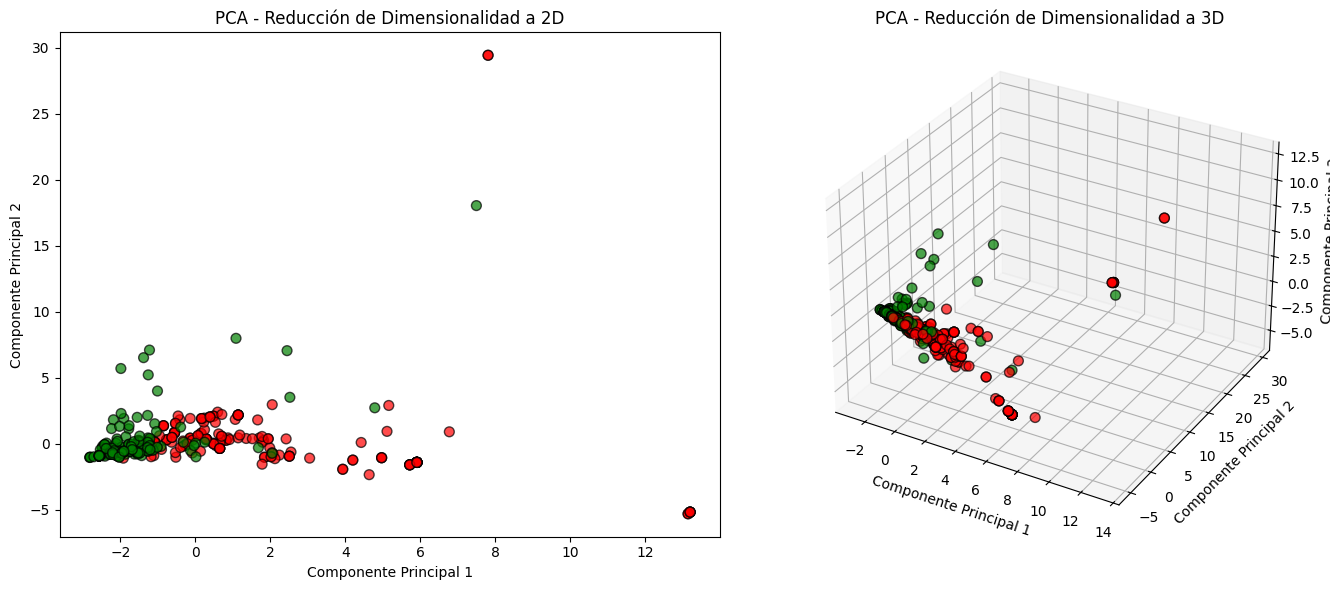

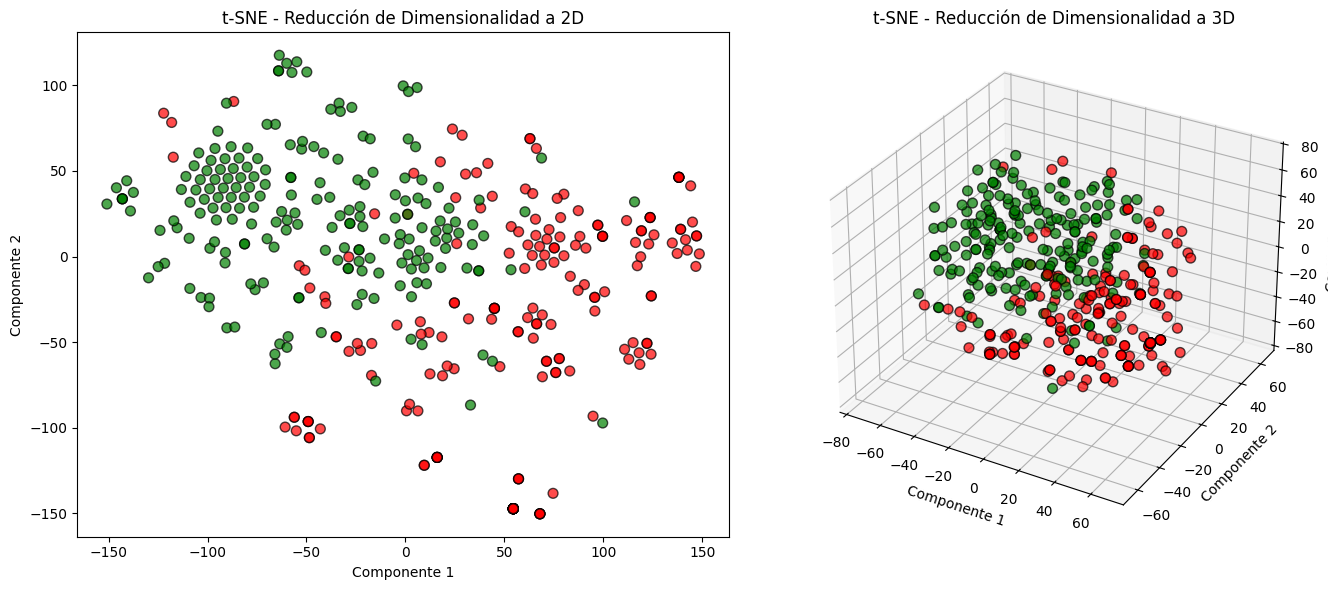

In [38]:
# Separar las características (X) y la etiqueta (y)
X = df.drop(columns=['type'])  # Eliminar la columna 'type' para obtener solo las características
y = df['type']  # La columna 'type' será la etiqueta (benigna o maliciosa)

# Estandarizar las características para PCA y t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA - Reducción a 2D y 3D
pca_2d = PCA(n_components=2).fit_transform(X_scaled)
pca_3d = PCA(n_components=3).fit_transform(X_scaled)

# t-SNE - Reducción a 2D y 3D
tsne_2d = TSNE(n_components=2).fit_transform(X_scaled)
tsne_3d = TSNE(n_components=3).fit_transform(X_scaled)

# Colores según la etiqueta 'y': verde para benignas (0) y rojo para maliciosas (1)
colors = ['green' if label == 0 else 'red' for label in y]

# Gráfico 1: PCA en 2D y 3D
fig_pca = plt.figure(figsize=(14, 6))

# Gráfico PCA 2D
ax1 = fig_pca.add_subplot(121)
ax1.scatter(pca_2d[:, 0], pca_2d[:, 1], c=colors, s=50, alpha=0.7, edgecolor='black')
ax1.set_title('PCA - Reducción de Dimensionalidad a 2D')
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')

# Gráfico PCA 3D
ax2 = fig_pca.add_subplot(122, projection='3d')
ax2.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=colors, s=50, alpha=0.7, edgecolor='black')
ax2.set_title('PCA - Reducción de Dimensionalidad a 3D')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')

# Mostrar gráfico PCA
plt.tight_layout()
plt.show()

# Gráfico 2: t-SNE en 2D y 3D
fig_tsne = plt.figure(figsize=(14, 6))

# Gráfico t-SNE 2D
ax3 = fig_tsne.add_subplot(121)
ax3.scatter(tsne_2d[:, 0], tsne_2d[:, 1], c=colors, s=50, alpha=0.7, edgecolor='black')
ax3.set_title('t-SNE - Reducción de Dimensionalidad a 2D')
ax3.set_xlabel('Componente 1')
ax3.set_ylabel('Componente 2')

# Gráfico t-SNE 3D
ax4 = fig_tsne.add_subplot(122, projection='3d')
ax4.scatter(tsne_3d[:, 0], tsne_3d[:, 1], tsne_3d[:, 2], c=colors, s=50, alpha=0.7, edgecolor='black')
ax4.set_title('t-SNE - Reducción de Dimensionalidad a 3D')
ax4.set_xlabel('Componente 1')
ax4.set_ylabel('Componente 2')
ax4.set_zlabel('Componente 3')

# Mostrar gráfico t-SNE
plt.tight_layout()
plt.show()

### Paso 8: Agrupamiento de datos

En este ejercicio, realizar el agrupamiento de los datos es necesario para entender cómo las aplicaciones maliciosas y benignas se distribuyen en el espacio de características, especialmente cuando se trata de datos de alta dimensionalidad. Dado que las aplicaciones Android se representan a través de una amplia variedad de características (como los permisos solicitados), las relaciones entre las muestras pueden no ser evidentes a simple vista. El agrupamiento nos permite identificar patrones y estructuras subyacentes en los datos que podrían indicar cómo las aplicaciones maliciosas se agrupan y se separan de las benignas.

Además, el agrupamiento ayuda a evaluar si el modelo de clasificación es capaz de diferenciar de manera efectiva entre las clases, ya que la separación clara entre las muestras benignas y maliciosas podría reflejar una distinción significativa en el espacio de características. Técnicas como K-means y Gaussian Mixture Models (GMM) permiten identificar posibles grupos de aplicaciones que comparten características similares, lo que puede proporcionar una validación adicional sobre la precisión de los modelos de clasificación y la utilidad de las características seleccionadas. En resumen, el agrupamiento es una herramienta valiosa para explorar, visualizar y mejorar los modelos de clasificación, facilitando una comprensión más profunda de la estructura de los datos.

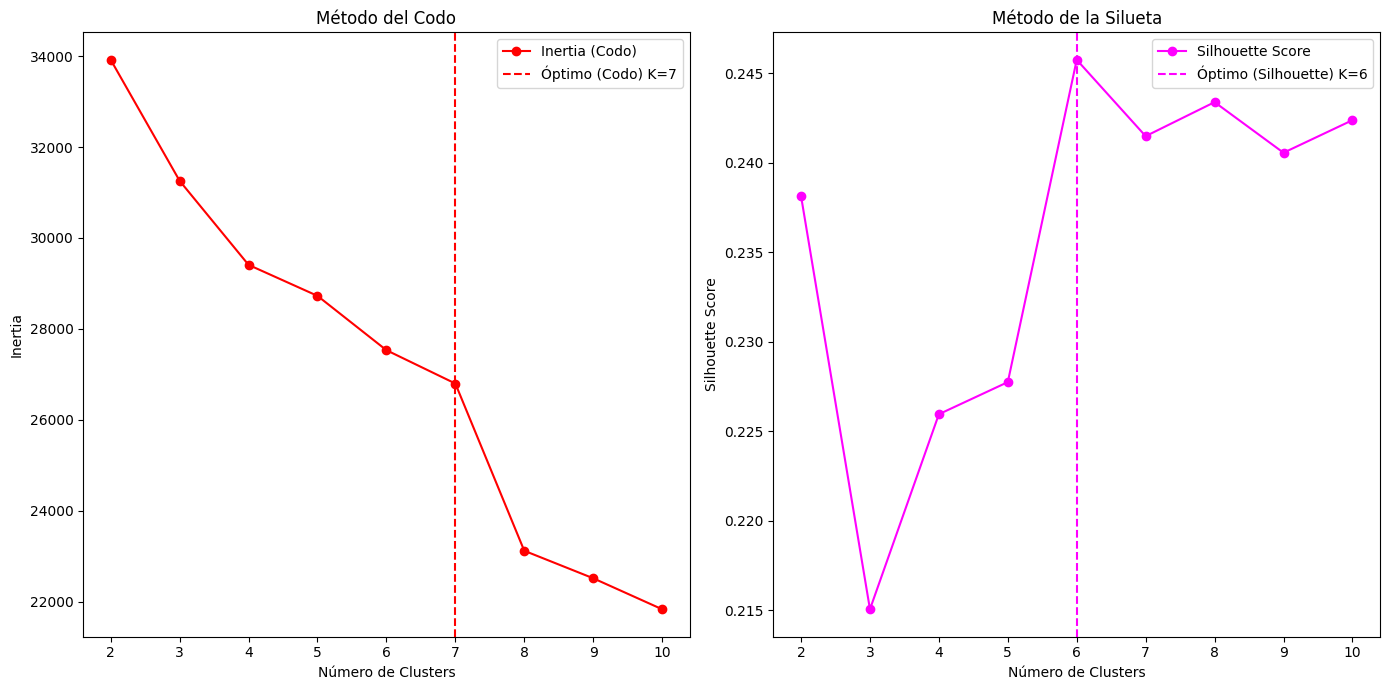

In [39]:
# Escalar los datos (importante para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X es tu conjunto de datos original

# Evaluar el método del codo (Inertia) y el método de la silueta para diferentes números de clusters (de 2 a 10)
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Evaluar entre 2 y 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Método del codo: Guardar la Inertia
    inertia.append(kmeans.inertia_)
    
    # Método de la silueta: Calcular el Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Determinar el número óptimo de clusters según el método del codo (elbow)
inertia_diff = np.diff(inertia)  # Diferencia entre los valores de inertia
optimal_k_elbow = np.argmin(inertia_diff) + 2  # Obtener el punto del codo

# Determinar el número óptimo de clusters según el método de la silueta
optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # Obtener el número de clusters con el mejor silhouette score

# Crear gráficos para ambos métodos
plt.figure(figsize=(14, 7))

# Gráfico del Codo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, label='Inertia (Codo)', color='red', marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', label=f'Óptimo (Codo) K={optimal_k_elbow}')
plt.legend(loc='upper right')

# Gráfico de la Silueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, label='Silhouette Score', color='magenta', marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método de la Silueta')
plt.axvline(x=optimal_k_silhouette, color='magenta', linestyle='--', label=f'Óptimo (Silhouette) K={optimal_k_silhouette}')
plt.legend(loc='upper right')

# Mostrar el gráfico con ambos métodos
plt.tight_layout()
plt.show()

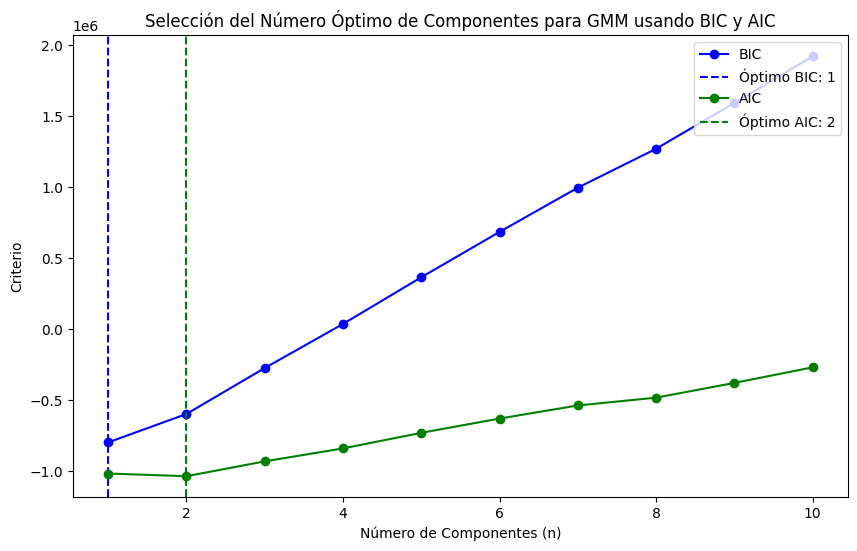

Número óptimo de componentes según BIC: 1
Número óptimo de componentes según AIC: 2


In [40]:
# Rango de valores posibles de n_components (el número de grupos)
n_components_range = range(1, 11)

# Inicializar listas para guardar los valores de BIC y AIC
bic_scores = []
aic_scores = []

# Calcular BIC y AIC para cada valor de n_components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)  # Ajustar el modelo GMM a los datos escalados
    bic_scores.append(gmm.bic(X_scaled))  # Almacenar el BIC
    aic_scores.append(gmm.aic(X_scaled))  # Almacenar el AIC

# Determinar el número óptimo de componentes según el BIC y el AIC
optimal_components_bic = n_components_range[np.argmin(bic_scores)]
optimal_components_aic = n_components_range[np.argmin(aic_scores)]

# Graficar BIC y AIC
plt.figure(figsize=(10, 6))

# Graficar BIC
plt.plot(n_components_range, bic_scores, label='BIC', color='blue', marker='o')
plt.axvline(optimal_components_bic, color='blue', linestyle='--', label=f'Óptimo BIC: {optimal_components_bic}')
plt.plot(n_components_range, aic_scores, label='AIC', color='green', marker='o')
plt.axvline(optimal_components_aic, color='green', linestyle='--', label=f'Óptimo AIC: {optimal_components_aic}')

# Etiquetas y título
plt.xlabel('Número de Componentes (n)')
plt.ylabel('Criterio')
plt.title('Selección del Número Óptimo de Componentes para GMM usando BIC y AIC')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

# Imprimir los números óptimos de componentes
print(f'Número óptimo de componentes según BIC: {optimal_components_bic}')
print(f'Número óptimo de componentes según AIC: {optimal_components_aic}')


El resultado que obtuviste:

- **Número óptimo de componentes según BIC: 1**
- **Número óptimo de componentes según AIC: 2**

Significa lo siguiente:

1. **BIC (Bayesian Information Criterion):**
   El **BIC** sugiere que el número óptimo de componentes para el modelo de **Gaussian Mixture Model (GMM)** es **1**. Esto significa que, según el BIC, un solo grupo (componente) es el modelo más adecuado para tus datos, ya que es el que minimiza la penalización por complejidad del modelo.

2. **AIC (Akaike Information Criterion):**
   El **AIC**, por otro lado, sugiere que el número óptimo de componentes es **2**. En este caso, el AIC favorece el modelo con 2 componentes, ya que proporciona un mejor equilibrio entre el ajuste del modelo y la complejidad (penalizando menos que el BIC).

**¿Por qué la diferencia?**

- **BIC** tiende a preferir modelos más simples (menos componentes) y penaliza más fuertemente la complejidad del modelo en comparación con el **AIC**. Esto es probablemente lo que explica que el BIC prefiera el modelo con solo **1 componente**.
  
- **AIC**, por otro lado, es menos estricto en la penalización por complejidad y favorece más la capacidad de ajuste del modelo, lo que puede explicar que haya elegido el modelo con **2 componentes**.

**¿Qué hacer con esto?**

Hay dos recomendaciones posibles basadas en los dos criterios:

- **Si prefieres un modelo más simple** y evitar el sobreajuste, el **BIC** recomienda un solo componente, lo cual es útil si tu objetivo es mantener un modelo lo más sencillo posible.
  
- **Si se desea un modelo más ajustado** a los datos (a costa de una mayor complejidad), el **AIC** sugiere que el modelo con **2 componentes** podría ser el mejor, ya que logra un mejor ajuste a los datos.

**¿Qué componente elegir?**
- Si tienes pocos datos o si prefieres un modelo más simple para evitar el sobreajuste, **1 componente** (según BIC) podría ser una opción adecuada.
- Si consideras que los datos son complejos y podría haber más de un grupo subyacente en los datos, **2 componentes** (según AIC) podría ser una mejor elección.

**El número óptimo de componentes según el BIC es 1**, lo que sugiere que tus datos pueden ser bien modelados con un solo grupo, mientras que el **AIC sugiere 2 componentes** para un mejor ajuste. Dependiendo de tus objetivos, puedes elegir entre uno u otro, pero generalmente es útil considerar ambos criterios y hacer una validación adicional, como visualización o análisis de la calidad del agrupamiento.


#### Analisis del agrupamiento

Del analisis anterior se puede ver que los métodos de agrupamiento automaticos por KMeans detectan un numero óptimo de grupos diferentes y alejados de la realidad. GMM muestra un resultado más adecuado. No obstante, forzaremos a KMeans a que realice el agrupamiento con 2 grupos, igual que GMM y luego evaluaremos la calidad de los grupos obtenidos por cada algoritmo.

Seguramente los algoritmos de agrupamiento asignarán los grupos en el orden que los encuentren. Esto quiere decir, que puede pasar que las muestras que sean "1" (maliciosas) se les asignen el grupo 0, ya que están primero en el dataset. Hay que tener en cuenta este detalle por que si no, los resultados del agrupamiento pueden ser erroneos o confusos.

In [69]:
# Escalar los datos (importante para KMeans y GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X es tu conjunto de datos original

# --------------------------
# 1. KMeans con 2 grupos
# --------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

Aqui puede pasar que los grupos asignados sean "0" para la clase "1" y "1" para la clase "0". Esto hará que los resultados de precision den mal. Para verificar esto hay que ver la relación entre los grupos obtenidos y los tipos originales.

In [70]:
result_kmeans = pd.DataFrame({
    'cluster assigned': kmeans_labels,  # Etiquetas de los clusters asignados
    'type': df["type"]                  # Etiquetas reales (benignas o maliciosas)
})

# Mostrar el DataFrame resultante
print(result_kmeans)

     cluster assigned  type
0                   0     1
1                   0     1
2                   0     1
3                   0     1
4                   1     1
..                ...   ...
393                 1     0
394                 1     0
395                 1     0
396                 1     0
397                 1     0

[398 rows x 2 columns]


Se puede ver que hay una asignacion correcta de grupos, pero los nombres de lso grupos no son correspondientes. Eso hay que solucionarlo, para que el grupo "0" sean las de la etiqueta "0" y el grupo "1" sean los de la etiqueta "1".

In [71]:
# Reemplazar los valores en la columna 'cluster assigned'
result_kmeans['cluster assigned'] = result_kmeans['cluster assigned'].replace({0: 1, 1: 0})

# Mostrar el DataFrame actualizado
print(result_kmeans)

     cluster assigned  type
0                   1     1
1                   1     1
2                   1     1
3                   1     1
4                   0     1
..                ...   ...
393                 0     0
394                 0     0
395                 0     0
396                 0     0
397                 0     0

[398 rows x 2 columns]


In [98]:
# Evaluar precisión (accuracy) de KMeans
accuracy_kmeans = accuracy_score(result_kmeans["cluster assigned"], y)

# Calcular el Adjusted Rand Index (ARI) para KMeans
ari_kmeans = adjusted_rand_score(result_kmeans["cluster assigned"], y)

# Calcular el Silhouette Score para KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

Ahora si hay correspondencia entre las etiquetas de los tipos de aplicaciones y los grupos obtenidos.

In [73]:
# --------------------------
# 2. Gaussian Mixture Models (GMM) con 2 grupos
# --------------------------
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

El mismo analisis de la correspondencia entre los grupos asignados y las etiquetas debe hacerse aca para GMM:

In [74]:
result_gmm = pd.DataFrame({
    'cluster assigned': gmm_labels,  # Etiquetas de los clusters asignados
    'type': df["type"]               # Etiquetas reales (benignas o maliciosas)
})

# Mostrar el DataFrame resultante
print(result_gmm)

     cluster assigned  type
0                   0     1
1                   0     1
2                   0     1
3                   0     1
4                   1     1
..                ...   ...
393                 1     0
394                 1     0
395                 1     0
396                 1     0
397                 1     0

[398 rows x 2 columns]


Igual que con KMeans, las etiquetas de los grupos y de los tipos de aplicaciones estan intercambiadas. Esto debe ajustarse.

In [75]:
# Reemplazar los valores en la columna 'cluster assigned'
result_gmm['cluster assigned'] = result_gmm['cluster assigned'].replace({0: 1, 1: 0})

# Mostrar el DataFrame actualizado
print(result_gmm)

     cluster assigned  type
0                   1     1
1                   1     1
2                   1     1
3                   1     1
4                   0     1
..                ...   ...
393                 0     0
394                 0     0
395                 0     0
396                 0     0
397                 0     0

[398 rows x 2 columns]


In [100]:
# Evaluar precisión (accuracy) de GMM
accuracy_gmm = accuracy_score(result_gmm["cluster assigned"], y)

# Calcular el Adjusted Rand Index (ARI) para GMM
ari_gmm = adjusted_rand_score(result_gmm["cluster assigned"], y)

# Calcular el Silhouette Score para GMM
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)

Ahora se pueden hacer las evaluaciones de calidad correspondientes.

In [101]:
# --------------------------
# 3. Evaluación de la calidad de los grupos
# --------------------------

# Evaluación de KMeans con Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, result_kmeans["cluster assigned"])

# Evaluación de GMM con Silhouette Score
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Silhouette Score de KMeans: {kmeans_silhouette}")
print(f"Silhouette Score de GMM: {gmm_silhouette}")

Silhouette Score de KMeans: 0.23814441269515993
Silhouette Score de GMM: 0.14823131304902742


Los valores de la silueta de por si solos no muestran toda la información, por lo que los grupos se deben graficar y para esto hay que llevar los datos a 2 y 3 dimensiones. Primero hay que usar PCA para reducir las dimensionalidades a 2 y 3 Principal Components. Comencemos con la representacion en 2D.

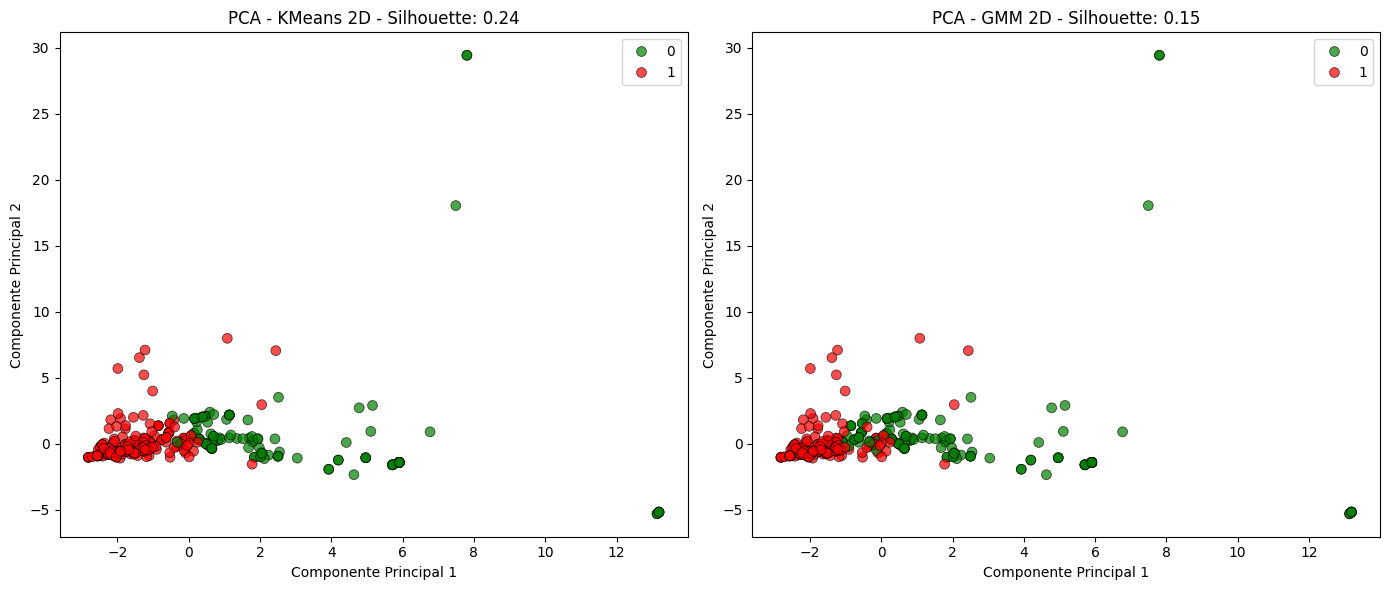

In [79]:
# -------------------------- 
# 4. Visualización 2D con PCA
# --------------------------

# Reducción de dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Crear el gráfico de 2D
fig = plt.figure(figsize=(14, 6))

# --------------------------
# Gráfico PCA 2D para KMeans y GMM
# --------------------------

# Subgráfico PCA 2D KMeans
ax1 = fig.add_subplot(121)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=kmeans_labels, palette={0: 'green', 1: 'red'}, s=50, alpha=0.7, edgecolor='black', ax=ax1)
ax1.set_title(f"PCA - KMeans 2D - Silhouette: {kmeans_silhouette:.2f}")
ax1.set_xlabel("Componente Principal 1")
ax1.set_ylabel("Componente Principal 2")

# Subgráfico PCA 2D GMM
ax2 = fig.add_subplot(122)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=gmm_labels, palette={0: 'green', 1: 'red'}, s=50, alpha=0.7, edgecolor='black', ax=ax2)
ax2.set_title(f"PCA - GMM 2D - Silhouette: {gmm_silhouette:.2f}")
ax2.set_xlabel("Componente Principal 1")
ax2.set_ylabel("Componente Principal 2")

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()


Ahora se sigue la representación en 3D:

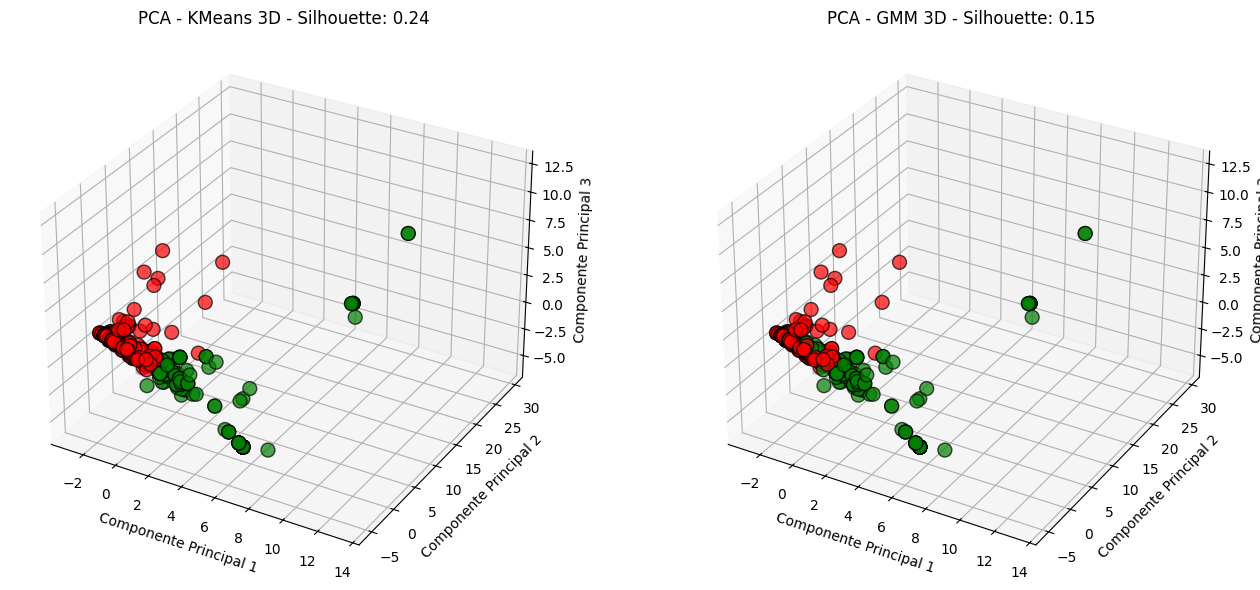

In [80]:
# --------------------------
# Gráfico PCA 3D para KMeans y GMM
# --------------------------
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Crear gráfico 3D
fig_3d = plt.figure(figsize=(14, 6))

# Subgráfico PCA 3D para KMeans
ax1_3d = fig_3d.add_subplot(121, projection='3d')

# Asignar colores manualmente: verde para clase 0 y rojo para clase 1
colores_kmeans = ['green' if label == 0 else 'red' for label in kmeans_labels]

# Graficar puntos con color personalizado y alpha 0.7, borde negro
ax1_3d.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                c=colores_kmeans, 
                s=100, alpha=0.7, edgecolor='black')

ax1_3d.set_title(f"PCA - KMeans 3D - Silhouette: {kmeans_silhouette:.2f}")
ax1_3d.set_xlabel("Componente Principal 1")
ax1_3d.set_ylabel("Componente Principal 2")
ax1_3d.set_zlabel("Componente Principal 3")

# Subgráfico PCA 3D para GMM
ax2_3d = fig_3d.add_subplot(122, projection='3d')

# Asignar colores manualmente: verde para clase 0 y rojo para clase 1
colores_gmm = ['green' if label == 0 else 'red' for label in gmm_labels]

# Graficar puntos con color personalizado y alpha 0.7, borde negro
ax2_3d.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                c=colores_gmm, 
                s=100, alpha=0.7, edgecolor='black')

ax2_3d.set_title(f"PCA - GMM 3D - Silhouette: {gmm_silhouette:.2f}")
ax2_3d.set_xlabel("Componente Principal 1")
ax2_3d.set_ylabel("Componente Principal 2")
ax2_3d.set_zlabel("Componente Principal 3")

# Mostrar el gráfico 3D
plt.tight_layout()
plt.show()



Los gráficos anteriores dan parte de la información, pero la calidad general del proceso de agrupamiento lo dan las matrices de confusión.

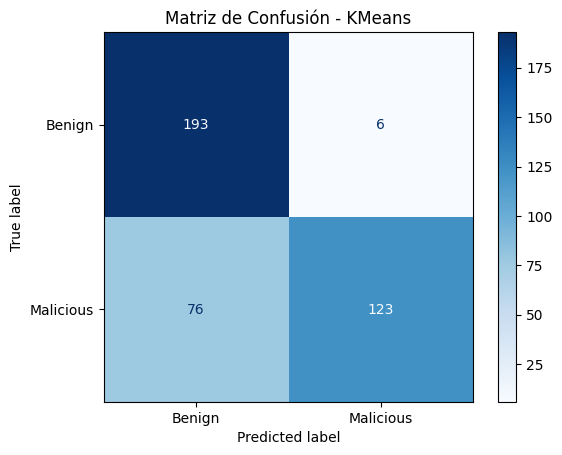

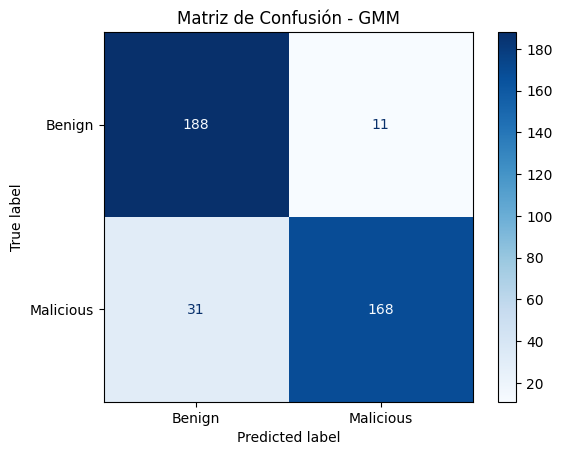

Evaluación KMeans:
Exactitud (Accuracy): 0.7940
Adjusted Rand Index (ARI): 0.3442
Silhouette Score: 0.2381

Evaluación GMM:
Exactitud (Accuracy): 0.8945
Adjusted Rand Index (ARI): 0.6215
Silhouette Score: 0.1482


In [102]:
# --------------------------
# Mostrar las matrices de confusión
# --------------------------

# Mostrar la matriz de confusión para KMeans
cm_kmeans = confusion_matrix(y, result_kmeans["cluster assigned"])
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=["Benign", "Malicious"])
disp_kmeans.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - KMeans")
plt.show()

# Mostrar la matriz de confusión para GMM
cm_gmm = confusion_matrix(y, result_gmm["cluster assigned"])
disp_gmm = ConfusionMatrixDisplay(confusion_matrix=cm_gmm, display_labels=["Benign", "Malicious"])
disp_gmm.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - GMM")
plt.show()

# Imprimir resultados
print("Evaluación KMeans:")
print(f"Exactitud (Accuracy): {accuracy_kmeans:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print()

print("Evaluación GMM:")
print(f"Exactitud (Accuracy): {accuracy_gmm:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Silhouette Score: {silhouette_gmm:.4f}")

#### **Evaluación de los Métodos de Agrupamiento: KMeans vs GMM**

A continuación se presenta el análisis de los resultados obtenidos para los métodos de agrupamiento **KMeans** y **GMM** con respecto a tres métricas clave: **Exactitud (Accuracy)**, **Adjusted Rand Index (ARI)** y **Silhouette Score**.

##### **1. Exactitud (Accuracy)**

La **exactitud** mide la proporción de etiquetas correctamente asignadas en comparación con las etiquetas reales. En este caso, los resultados son los siguientes:

- **KMeans (0.7940)**: Este valor indica que **KMeans** tiene una **alta exactitud**, sugiriendo que la mayoría de las muestras han sido agrupadas correctamente en relación con las etiquetas reales.
- **GMM (0.8945)**: **GMM** muestra una **exactitud aún mayor**, indicando que está realizando un trabajo más preciso al asignar muestras a los grupos correctos en comparación con KMeans.

**Interpretación:** Ambos modelos tienen un desempeño sólido en términos de exactitud, con **GMM** destacándose ligeramente por encima de **KMeans**.

##### **2. Adjusted Rand Index (ARI)**

El **ARI** mide la similitud entre los agrupamientos generados y las etiquetas reales, ajustado por el azar. Los resultados son:

- **KMeans (0.3442)**: El valor moderado del **ARI** para **KMeans** sugiere que, aunque hay alguna correspondencia entre los agrupamientos y las etiquetas reales, el modelo no es perfecto y puede estar cometiendo errores en la asignación de algunas muestras.
- **GMM (0.6215)**: **GMM** tiene un valor de **ARI más alto**, lo que indica una **mejor correspondencia** con las etiquetas reales. Esto sugiere que **GMM** es más efectivo para capturar las relaciones subyacentes entre las muestras y las categorías reales.

**Interpretación:** **GMM** tiene una **mejor correspondencia con las etiquetas reales** que **KMeans**, lo que indica que este modelo está realizando un agrupamiento más coherente con la estructura de los datos.

##### **3. Silhouette Score**

El **Silhouette Score** mide la calidad del agrupamiento, evaluando tanto la cohesión interna como la separación entre los grupos. Los resultados son:

- **KMeans (0.2381)**: Este valor positivo, aunque bajo, sugiere que los grupos generados por **KMeans** están **moderadamente separados**. Sin embargo, la cohesión dentro de los grupos no es ideal, lo que indica que algunos puntos podrían estar mal asignados o que los grupos no son perfectamente definidos.
- **GMM (0.1482)**: **GMM** presenta un **Silhouette Score aún más bajo**, lo que sugiere que los grupos generados por este modelo no están tan bien definidos como los de KMeans. La separación entre los grupos es menor, lo que puede indicar que las muestras dentro de cada grupo están más dispersas.

**Interpretación:** Aunque **KMeans** muestra una **mejor separación entre los grupos**, su **Silhouette Score** sigue siendo bajo, lo que sugiere que hay margen de mejora en la calidad de los agrupamientos. **GMM**, por otro lado, tiene un **Silhouette Score aún más bajo**, lo que indica que sus grupos no están tan bien definidos.

---

#### **Resumen Final:**

- **KMeans** muestra un **desempeño sólido en exactitud** y **moderada correspondencia con las etiquetas reales** (ARI de 0.3442). Aunque los grupos están algo separados, la **cohesión interna** podría mejorarse, como lo indica su **Silhouette Score** de 0.2381.
  
- **GMM** tiene una **mejor correspondencia con las etiquetas reales** (ARI de 0.6215) y una **alta exactitud** (0.8945). Sin embargo, su **Silhouette Score** es aún más bajo (0.1482), lo que indica que los grupos generados no son tan bien definidos o separados.

**Conclusión:** Aunque **GMM** parece ser más efectivo en cuanto a la alineación con las etiquetas reales, **KMeans** presenta una **mejor separación interna** de los grupos. Ambos modelos tienen resultados mixtos, y la elección del modelo adecuado podría depender de los objetivos específicos del análisis (cohesión vs correspondencia con etiquetas reales).


### Paso 9: Entrenamiento de algoritmos de aprendizaje

En este análisis, se construirá un proceso automatizado para evaluar el rendimiento de distintos clasificadores en un conjunto de datos específico. Esto se hará mediante un pipeline de machine learning que nos permita probar varios modelos de clasificación, aplicar una estandarización común y registrar métricas de rendimiento clave. 

#### Propósito y Objetivos

El objetivo principal es **determinar cuál de los clasificadores seleccionados ofrece el mejor rendimiento** en la tarea de clasificación, utilizando un conjunto de métricas comparativas. Esto nos ayudará a comprender qué modelos son más efectivos para el tipo de datos y la estructura de clases que estamos manejando, facilitando así una toma de decisiones informada sobre el modelo óptimo a utilizar en producción o en futuras fases del proyecto.

#### Clasificadores y Métricas de Evaluación

Se seleccionarán varios clasificadores populares y ampliamente utilizados en machine learning, entre ellos:

- **Random Forest**: Un modelo basado en árboles de decisión que mejora la precisión al promediar múltiples árboles.
- **Logistic Regression**: Modelo lineal adecuado para clasificaciones binarias.
- **Support Vector Machine (SVM)**: Un modelo que maximiza el margen de separación entre clases, adecuado para problemas lineales y no lineales.
- **Decision Tree**: Un clasificador intuitivo basado en reglas que segmenta el espacio de decisiones.
- **K-Nearest Neighbors (KNN)**: Un clasificador basado en la distancia, útil para relaciones no lineales.
- **Naive Bayes**: Un modelo probabilístico basado en la teoría de Bayes, especialmente útil para datos categóricos y texto.

Para cada clasificador, se calcularán y registrarán las siguientes métricas:

- **Exactitud (Accuracy)**: Proporción de predicciones correctas sobre el total de instancias.
- **Precisión (Precision)**: Proporción de verdaderos positivos entre todos los positivos predichos, que mide la calidad de las predicciones positivas.
- **Recall**: Proporción de verdaderos positivos entre todos los positivos reales, que indica la capacidad del modelo para capturar todos los casos positivos.
- **F1 Score**: Media armónica de la precisión y el recall, que equilibra ambas métricas.

#### Proceso de Evaluación

Se construirá un pipeline de machine learning donde cada clasificador se combinará con un proceso de estandarización, de manera que todos los modelos operen con los mismos datos preprocesados. Esto asegura que los resultados sean comparables entre los distintos modelos. Posteriormente, se graficarán las métricas de cada clasificador para visualizar de manera clara sus rendimientos relativos.

#### Objetivo Final

Con esta comparación, se pretende seleccionar el modelo con el rendimiento más alto y consistente para la tarea de clasificación en cuestión. Al final del análisis, se espera poder tomar decisiones informadas sobre el clasificador más adecuado para futuras implementaciones, con base en evidencia cuantitativa de desempeño.


Primero se debe separar el set de entrenamiento en sus partes:

In [103]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Se evaluaran varios clasificadores de una manera automatizada. Para ello se debe tener una lista con los clasificadores a evaluar.

In [104]:
# Diccionario de clasificadores a probar
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

De este proceso automatizado de evaluación de los clasificadores se obtendrán diversos resultados de su desempeño, por lo que se deben guardar en una lista para su posterior análisis.

In [105]:
# Crear un diccionario para almacenar los resultados
results = {"Classifier": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

En este punto está todo listo para comenzar el proceso de aprendizaje automatizado con lso clasificadores seleccionados.

In [106]:
# Iterar sobre cada clasificador en el diccionario
for name, clf in classifiers.items():
    print(f"\nIniciando entrenamiento para: {name}...")  # Mensaje de inicio de entrenamiento

    # Crear un pipeline con estandarización y el clasificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Entrenar el clasificador
    pipeline.fit(X_train, y_train)
    print(f"{name} - Entrenamiento completado.")  # Confirmación de entrenamiento completado
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)
    print(f"{name} - Predicción en conjunto de prueba realizada.")  # Confirmación de predicción completada
    
    # Calcular las métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Guardar los resultados
    results["Classifier"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    
    # Mostrar las métricas calculadas para cada clasificador
    print(f"{name} - Métricas: "
          f"Exactitud (Accuracy): {accuracy:.4f}, "
          f"Precisión (Precision): {precision:.4f}, "
          f"Recuperación (Recall): {recall:.4f}, "
          f"Puntuación F1: {f1:.4f}")

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)
print("\nProceso completado. Resultados almacenados en 'results_df'.")



Iniciando entrenamiento para: Random Forest...
Random Forest - Entrenamiento completado.
Random Forest - Predicción en conjunto de prueba realizada.
Random Forest - Métricas: Exactitud (Accuracy): 0.8917, Precisión (Precision): 0.8981, Recuperación (Recall): 0.8917, Puntuación F1: 0.8918

Iniciando entrenamiento para: Logistic Regression...
Logistic Regression - Entrenamiento completado.
Logistic Regression - Predicción en conjunto de prueba realizada.
Logistic Regression - Métricas: Exactitud (Accuracy): 0.9000, Precisión (Precision): 0.9048, Recuperación (Recall): 0.9000, Puntuación F1: 0.9002

Iniciando entrenamiento para: Support Vector Machine...
Support Vector Machine - Entrenamiento completado.
Support Vector Machine - Predicción en conjunto de prueba realizada.
Support Vector Machine - Métricas: Exactitud (Accuracy): 0.9250, Precisión (Precision): 0.9285, Recuperación (Recall): 0.9250, Puntuación F1: 0.9251

Iniciando entrenamiento para: Decision Tree...
Decision Tree - Entren

Una vez concluido el aprendizaje, entonces se grafican lso resultados.

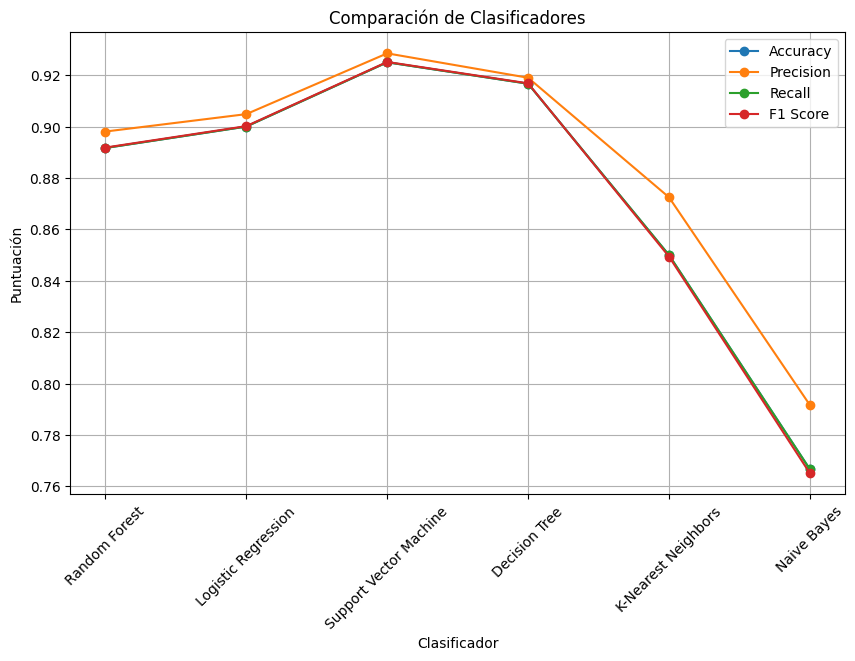

In [107]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.plot(results_df["Classifier"], results_df[metric], marker='o', label=metric)
    
plt.title("Comparación de Clasificadores")
plt.xlabel("Clasificador")
plt.ylabel("Puntuación")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

El grafico anterior no da muy buena visualizacion de los resultados, pro lo que hay que mostrarlos en forma de tabla y mediante otros graficos:

In [108]:
# Mostrar la tabla con los resultados
pd.set_option('display.max_rows', None)  # Mostrar todas las filas si hay muchas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas si hay muchas
display(results_df)  # Esta es la forma de mostrar la tabla de manera interactiva en Jupyter


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.891667,0.898058,0.891667,0.891825
1,Logistic Regression,0.900000,0.904835,0.900000,0.900167
2,Support Vector Machine,0.925000,0.928472,0.925000,0.925130
3,Decision Tree,0.916667,0.918982,0.916667,0.916806
4,K-Nearest Neighbors,0.850000,0.872478,0.850000,0.849416
5,Naive Bayes,0.766667,0.791655,0.766667,0.765107


**Clasificadores Evaluados:**
1. Random Forest
2. Logistic Regression
3. Support Vector Machine (SVM)
4. Decision Tree
5. K-Nearest Neighbors (KNN)
6. Naive Bayes

Cada clasificador tiene cuatro métricas clave de rendimiento evaluadas:

1. Accuracy (Exactitud): Proporción de predicciones correctas respecto al total de predicciones. Es una métrica general para ver cuán preciso es el clasificador en términos globales.
2. Precision (Precisión): Proporción de predicciones positivas correctas respecto al total de predicciones positivas realizadas. Indica cuán confiable es el modelo cuando predice una clase positiva.
3. Recall (Recuperación): Proporción de casos positivos correctamente identificados respecto al total de casos que realmente son positivos. Mide cuán bien el modelo captura todos los casos positivos.
4. F1 Score: Es la media armónica de la precisión y el recall, proporcionando un balance entre ambas métricas. Es útil cuando se necesita un equilibrio entre precisión y recall.

**Análisis de Resultados:**

- **Support Vector Machine (SVM)**
    - Accuracy: 92.5%
    - Precision: 92.85%
    - Recall: 92.5%
    - F1 Score: 92.51%
    
    SVM muestra el mejor rendimiento en comparación con los otros clasificadores en todas las métricas. Este modelo es el más preciso y equilibrado, con altos valores en precisión, recall y F1 score, lo que sugiere que es muy bueno tanto para identificar correctamente los casos positivos como para evitar falsos positivos.

- **Decision Tree**

    - Accuracy: 91.67%
    - Precision: 91.90%
    - Recall: 91.67%
    - F1 Score: 91.68%

    Decision Tree también tiene un buen rendimiento, aunque ligeramente inferior al de SVM. Muestra una alta precisión y recall, lo que significa que está clasificando bien las muestras, pero su rendimiento no es tan robusto como el de SVM.

- **Random Forest & Logistic Regression**

    - Accuracy: 90%
    -  Precision: 90.48%
    - Recall: 90%
    - F1 Score: 90.02%

    Random Forest y Logistic Regression tienen el mismo rendimiento en todas las métricas. Están bien equilibrados, con una alta exactitud, precisión y recall, pero todavía no alcanzan el nivel de SVM y Decision Tree.

- **K-Nearest Neighbors (KNN)**

    - Accuracy: 85%
    - Precision: 87.25%
    - Recall: 85%
    - F1 Score: 84.94%
    
    KNN tiene un desempeño más bajo en comparación con los otros clasificadores. Aunque su precisión es algo alta, su recall y F1 score son más bajos, lo que podría indicar que el modelo tiene dificultades para identificar todos los casos positivos correctamente.

- **Naive Bayes**

    - Accuracy: 76.67%
    - Precision: 79.17%
    - Recall: 76.67%
    - F1 Score: 76.51%

    Naive Bayes es el clasificador con el peor rendimiento. Su exactitud y métricas asociadas (precisión, recall y F1 score) son significativamente más bajas que las de los otros clasificadores. Esto sugiere que no es tan eficiente en este conjunto de datos específico, posiblemente debido a las suposiciones simplificadas que hace este modelo sobre la independencia de las características.

**Resultado**

SVM es el mejor clasificador en términos de accuracy, precision, recall y F1 score.
Decision Tree y Random Forest son también muy buenos, con un rendimiento cercano al de SVM.
KNN y Naive Bayes tienen un desempeño más bajo en comparación con los modelos anteriores.
En general, si buscas el clasificador más balanceado, SVM parece ser la mejor opción según estos resultados.

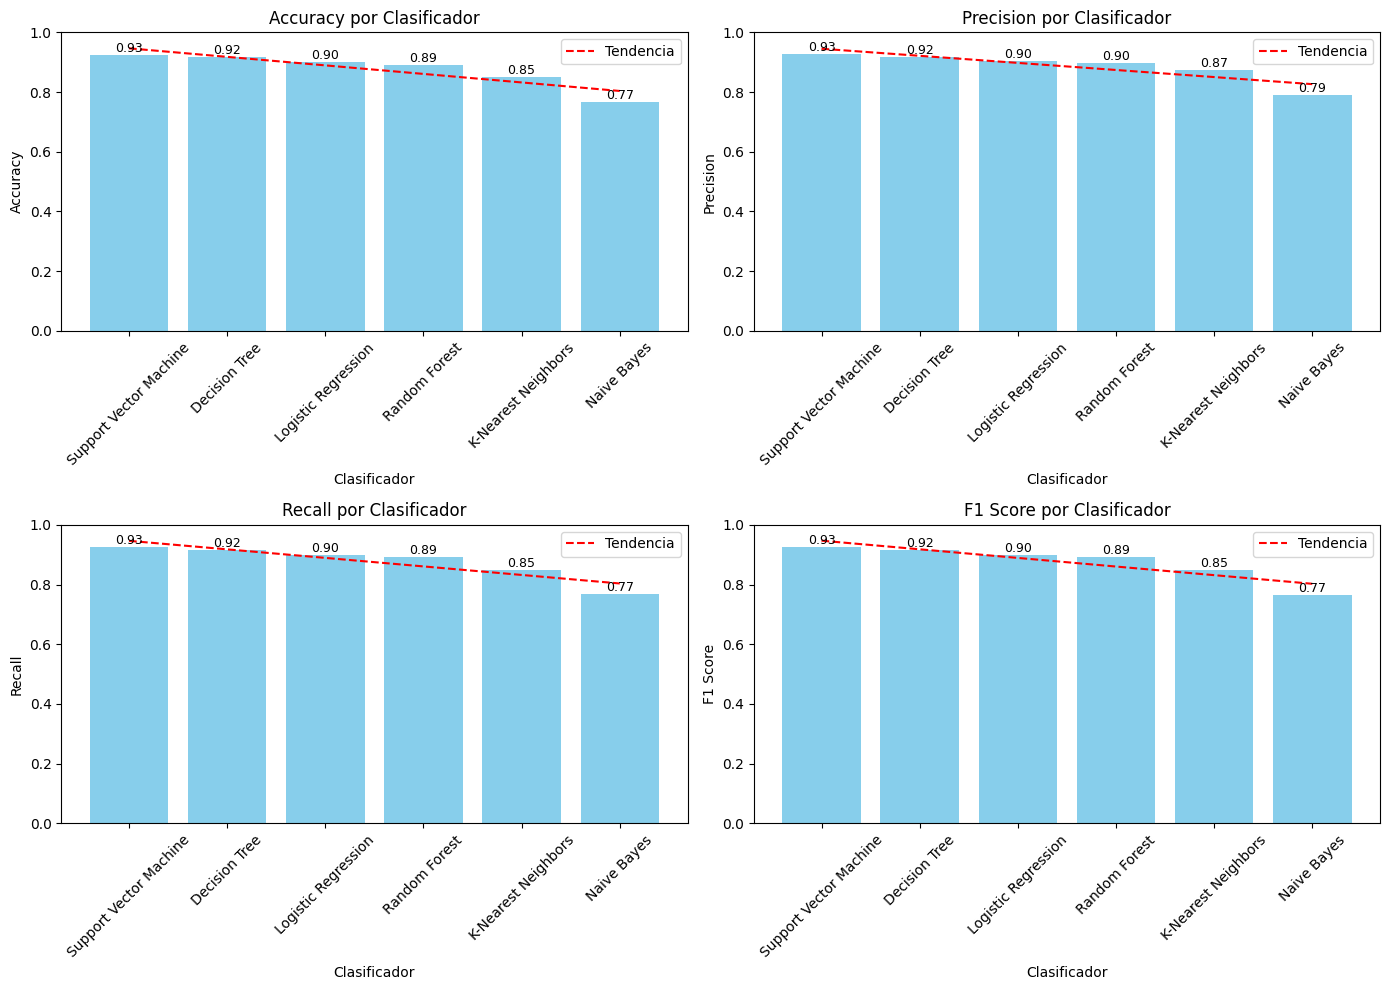


El mejor clasificador en términos de Accuracy es Support Vector Machine con un Accuracy de 0.9250.


In [109]:
# Establecer la métrica a usar para determinar el mejor clasificador
mejor_metrica = "Accuracy"  # Puedes cambiar "Accuracy" por "Precision", "Recall" o "F1 Score"
mejor_clasificador = results_df.loc[results_df[mejor_metrica].idxmax()]

# Graficar los resultados en un gráfico de barras
plt.figure(figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Crear un gráfico de barras para cada métrica
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # Crear subgráficos en una cuadrícula 2x2
    valores_metric = results_df[metric]
    clasificadores = results_df["Classifier"]
    
    # Ordenar los valores y clasificadores de mayor a menor
    sorted_indices = np.argsort(valores_metric)[::-1]  # Ordenar en orden descendente
    valores_metric_sorted = valores_metric.iloc[sorted_indices]
    clasificadores_sorted = clasificadores.iloc[sorted_indices]
    
    # Crear gráfico de barras
    bars = plt.bar(clasificadores_sorted, valores_metric_sorted, color='skyblue')
    plt.title(f"{metric} por Clasificador")
    plt.xlabel("Clasificador")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Para que todas las métricas estén en la misma escala
    
    # Agregar los valores en cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha="center", va="bottom", fontsize=9)
    
    # Agregar una línea de tendencia
    z = np.polyfit(range(len(valores_metric_sorted)), valores_metric_sorted, 1)
    p = np.poly1d(z)
    plt.plot(clasificadores_sorted, p(range(len(valores_metric_sorted))), color="red", linestyle="--", label="Tendencia")
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar el mejor clasificador según la métrica establecida
print(f"\nEl mejor clasificador en términos de {mejor_metrica} es {mejor_clasificador['Classifier']} "
      f"con un {mejor_metrica} de {mejor_clasificador[mejor_metrica]:.4f}.")


Las métricas como Accuracy, Precision y Recall pueden ser confusas en determinados casos, por loq ue el uso de otras métricas como el AUC-ROC podrian ser más pertinentes

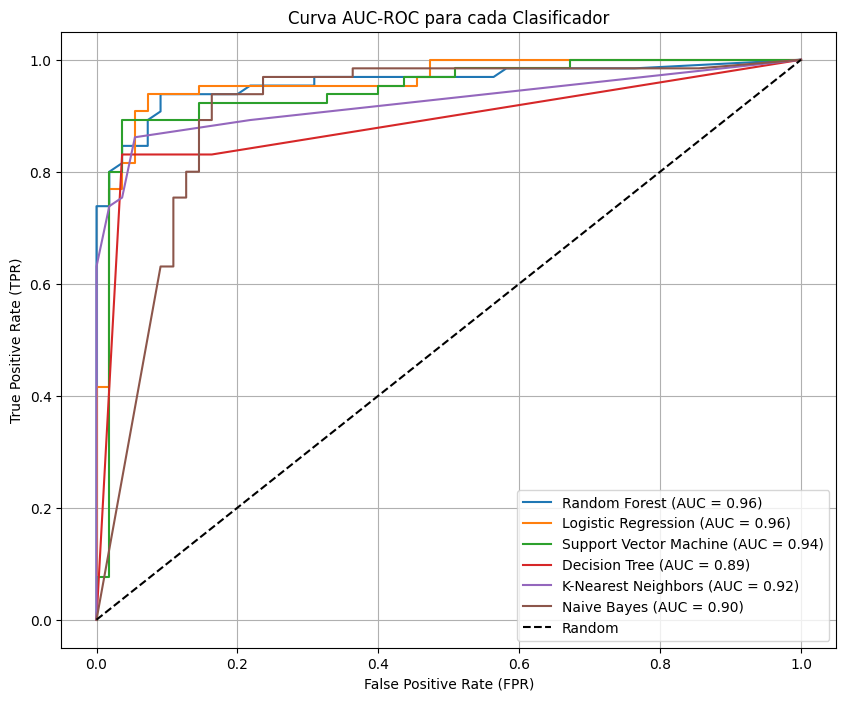


El mejor clasificador en términos de AUC es Logistic Regression con un AUC de 0.9608.


In [110]:
# Crear el gráfico ROC para todos los clasificadores
plt.figure(figsize=(10, 8))
best_auc = 0
best_classifier = None

# Iterar sobre cada clasificador en el diccionario y calcular su ROC
for name, clf in classifiers.items():
    # Crear el pipeline de estandarización y el clasificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Entrenar el clasificador
    pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades de predicción
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else pipeline.decision_function(X_test)
    
    # Calcular el AUC-ROC y la curva ROC
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Graficar la curva ROC de cada clasificador
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
    
    # Actualizar el mejor clasificador según el AUC
    if auc > best_auc:
        best_auc = auc
        best_classifier = name

# Graficar la línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Configuración del gráfico
plt.title("Curva AUC-ROC para cada Clasificador")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()

# Mostrar el gráfico
plt.show()

# Mostrar el mejor clasificador en términos de AUC
print(f"\nEl mejor clasificador en términos de AUC es {best_classifier} con un AUC de {best_auc:.4f}.")


**¿Por qué el AUC-ROC es la mejor métrica para evaluar el desempeño de clasificadores?**

- **Independiente del umbral**: No depende de un umbral específico para clasificar las muestras, lo que permite evaluar el modelo en todos los posibles umbrales.
  
- **Mide la capacidad de discriminación**: Evalúa qué tan bien el modelo puede distinguir entre las clases positivas y negativas.

- **Robusto frente a clases desbalanceadas**: Es menos afectado por el desbalance de clases, a diferencia de métricas como la exactitud.

- **Facilidad para comparar clasificadores**: Permite comparar fácilmente el rendimiento de diferentes modelos con una métrica única.

- **Interpretación intuitiva**: Un AUC de 0.5 indica un modelo aleatorio, y 1.0 un modelo perfecto, lo que facilita su comprensión.

- **Refleja un balance entre falsos positivos y verdaderos positivos**: Muestra cómo cambia el rendimiento del modelo a medida que varía el umbral de clasificación.

A todas estas, el AUC-ROC es preferido por su versatilidad, robustez ante desbalances de clase, capacidad para comparar modelos y su interpretación clara.
